# Section B : Classification  
## Target Variable is online_order

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='ignore')
pd.options.display.max_columns = None
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize']=(15,8)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from scipy import stats

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_validate,cross_val_score

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,\
BaggingClassifier,VotingClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score,\
cohen_kappa_score,accuracy_score,precision_recall_curve,roc_auc_score,roc_curve

from xgboost import XGBClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFECV

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Data Understanding

In [4]:
df_zomato = pd.read_csv('df_zomato_new2.csv')
df_zomato.head()

,votes,rate,approx_cost(for two people),online_order,book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
0,775,4.1,800.0,1,1,1,24,1894,0,1
1,787,4.1,800.0,1,0,1,24,816,0,1
2,918,3.8,800.0,1,0,1,19,653,0,1
3,88,3.7,300.0,0,0,1,73,2221,0,1
4,166,3.8,600.0,0,0,4,24,1921,0,1


In [5]:
df_zomato.shape

(38921, 10)

In [6]:
# There are 38921 rows and 10 columns

In [7]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38921 entries, 0 to 38920
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   votes                        38921 non-null  int64  
 1   rate                         38921 non-null  float64
 2   approx_cost(for two people)  38921 non-null  float64
 3   online_order                 38921 non-null  int64  
 4   book_table                   38921 non-null  int64  
 5   location                     38921 non-null  int64  
 6   rest_type                    38921 non-null  int64  
 7   cuisines                     38921 non-null  int64  
 8   listed_in(type)              38921 non-null  int64  
 9   listed_in(city)              38921 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 3.0 MB


In [8]:
df_zomato.isnull().sum()

votes                          0
rate                           0
approx_cost(for two people)    0
online_order                   0
book_table                     0
location                       0
rest_type                      0
cuisines                       0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [9]:
# There is no null values in the dataset

In [10]:
df_zomato.describe()

,votes,rate,approx_cost(for two people),online_order,book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
count,38921.000000,38921.000000,38921.000000,38921.000000,38921.000000,38921.000000,38921.000000,38921.000000,38921.000000,38921.000000
mean,185.266745,3.664189,568.768942,0.659593,0.121194,35.464043,46.005935,1214.438889,2.788135,14.214409
std,277.770360,0.420193,440.447301,0.473852,0.326357,26.683595,26.232503,672.084831,1.137411,8.291205
min,0.000000,1.800000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,3.400000,300.000000,0.000000,0.000000,12.000000,24.000000,590.000000,2.000000,7.000000
50%,64.000000,3.700000,450.000000,1.000000,0.000000,31.000000,37.000000,1276.000000,2.000000,15.000000
75%,216.000000,4.000000,700.000000,1.000000,0.000000,54.000000,73.000000,1700.000000,4.000000,20.000000
max,1499.000000,4.900000,6000.000000,1.000000,1.000000,91.000000,86.000000,2366.000000,6.000000,29.000000


# Visualization

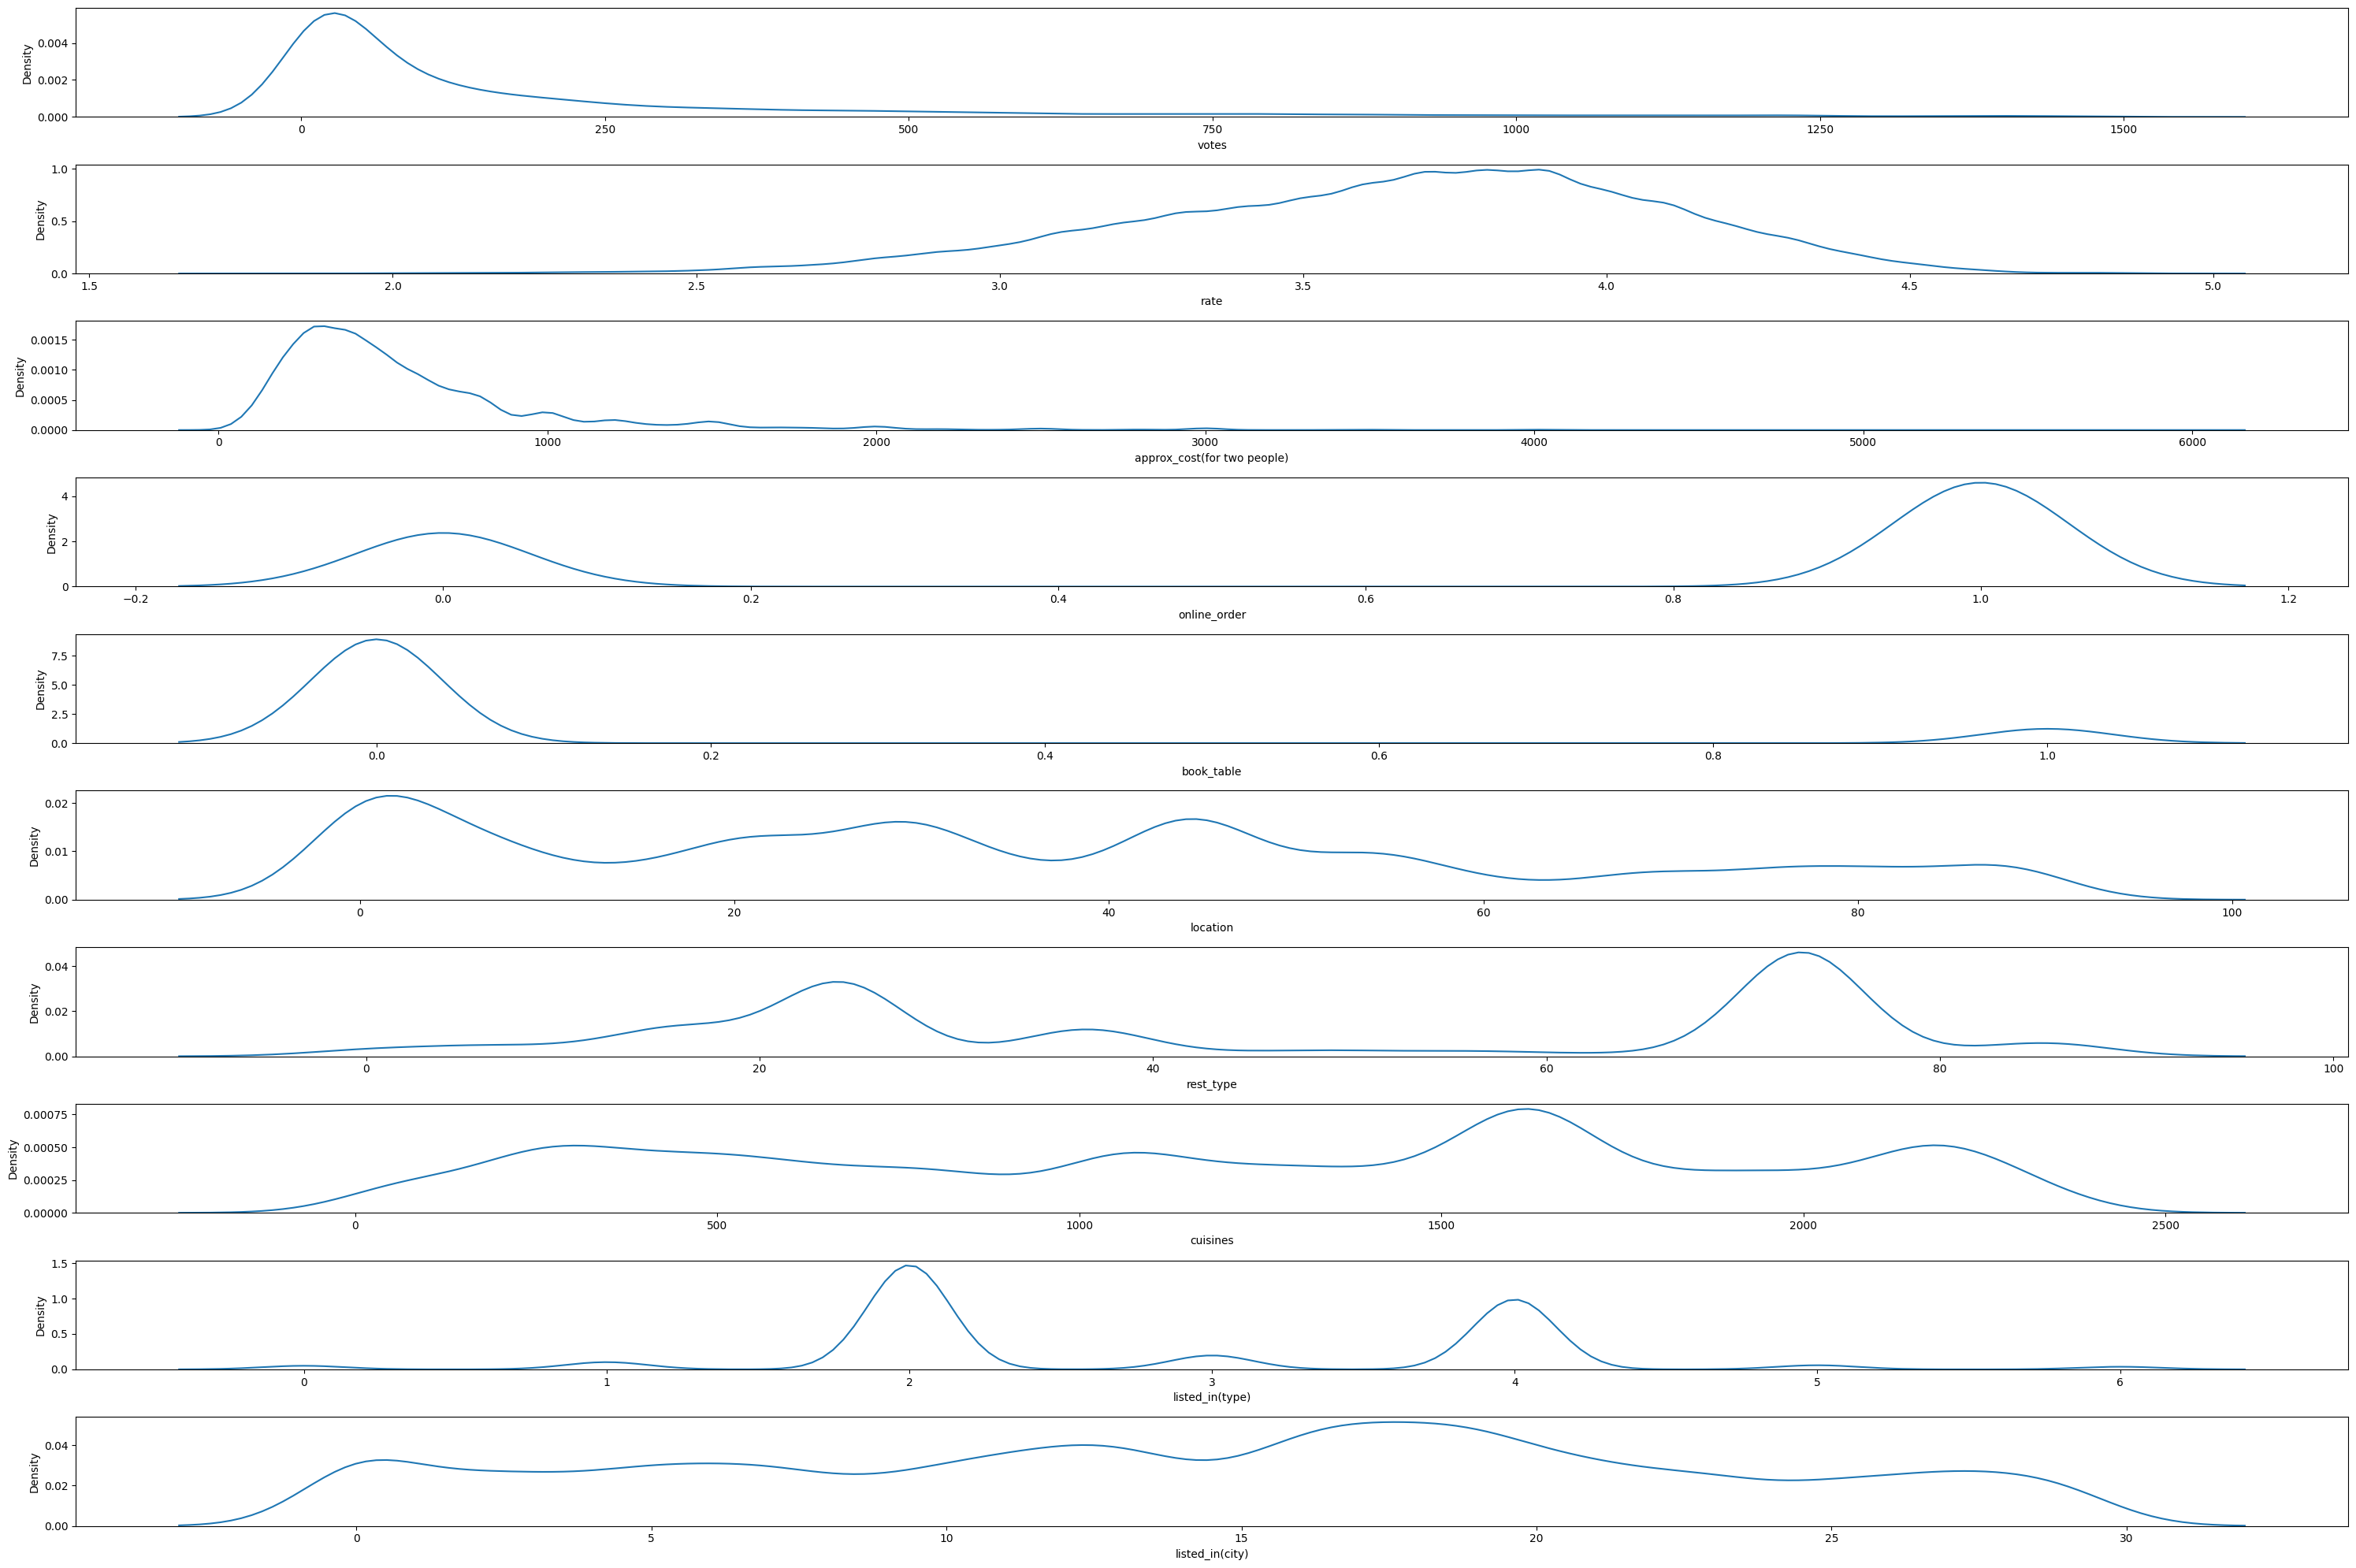

In [11]:
fig,ax= plt.subplots(nrows=10,ncols=1,figsize=(30,20))

for var,subplot in zip(df_zomato.columns,ax.flatten()):
    sns.kdeplot(x=df_zomato[var],ax=subplot)
plt.tight_layout()
plt.show()

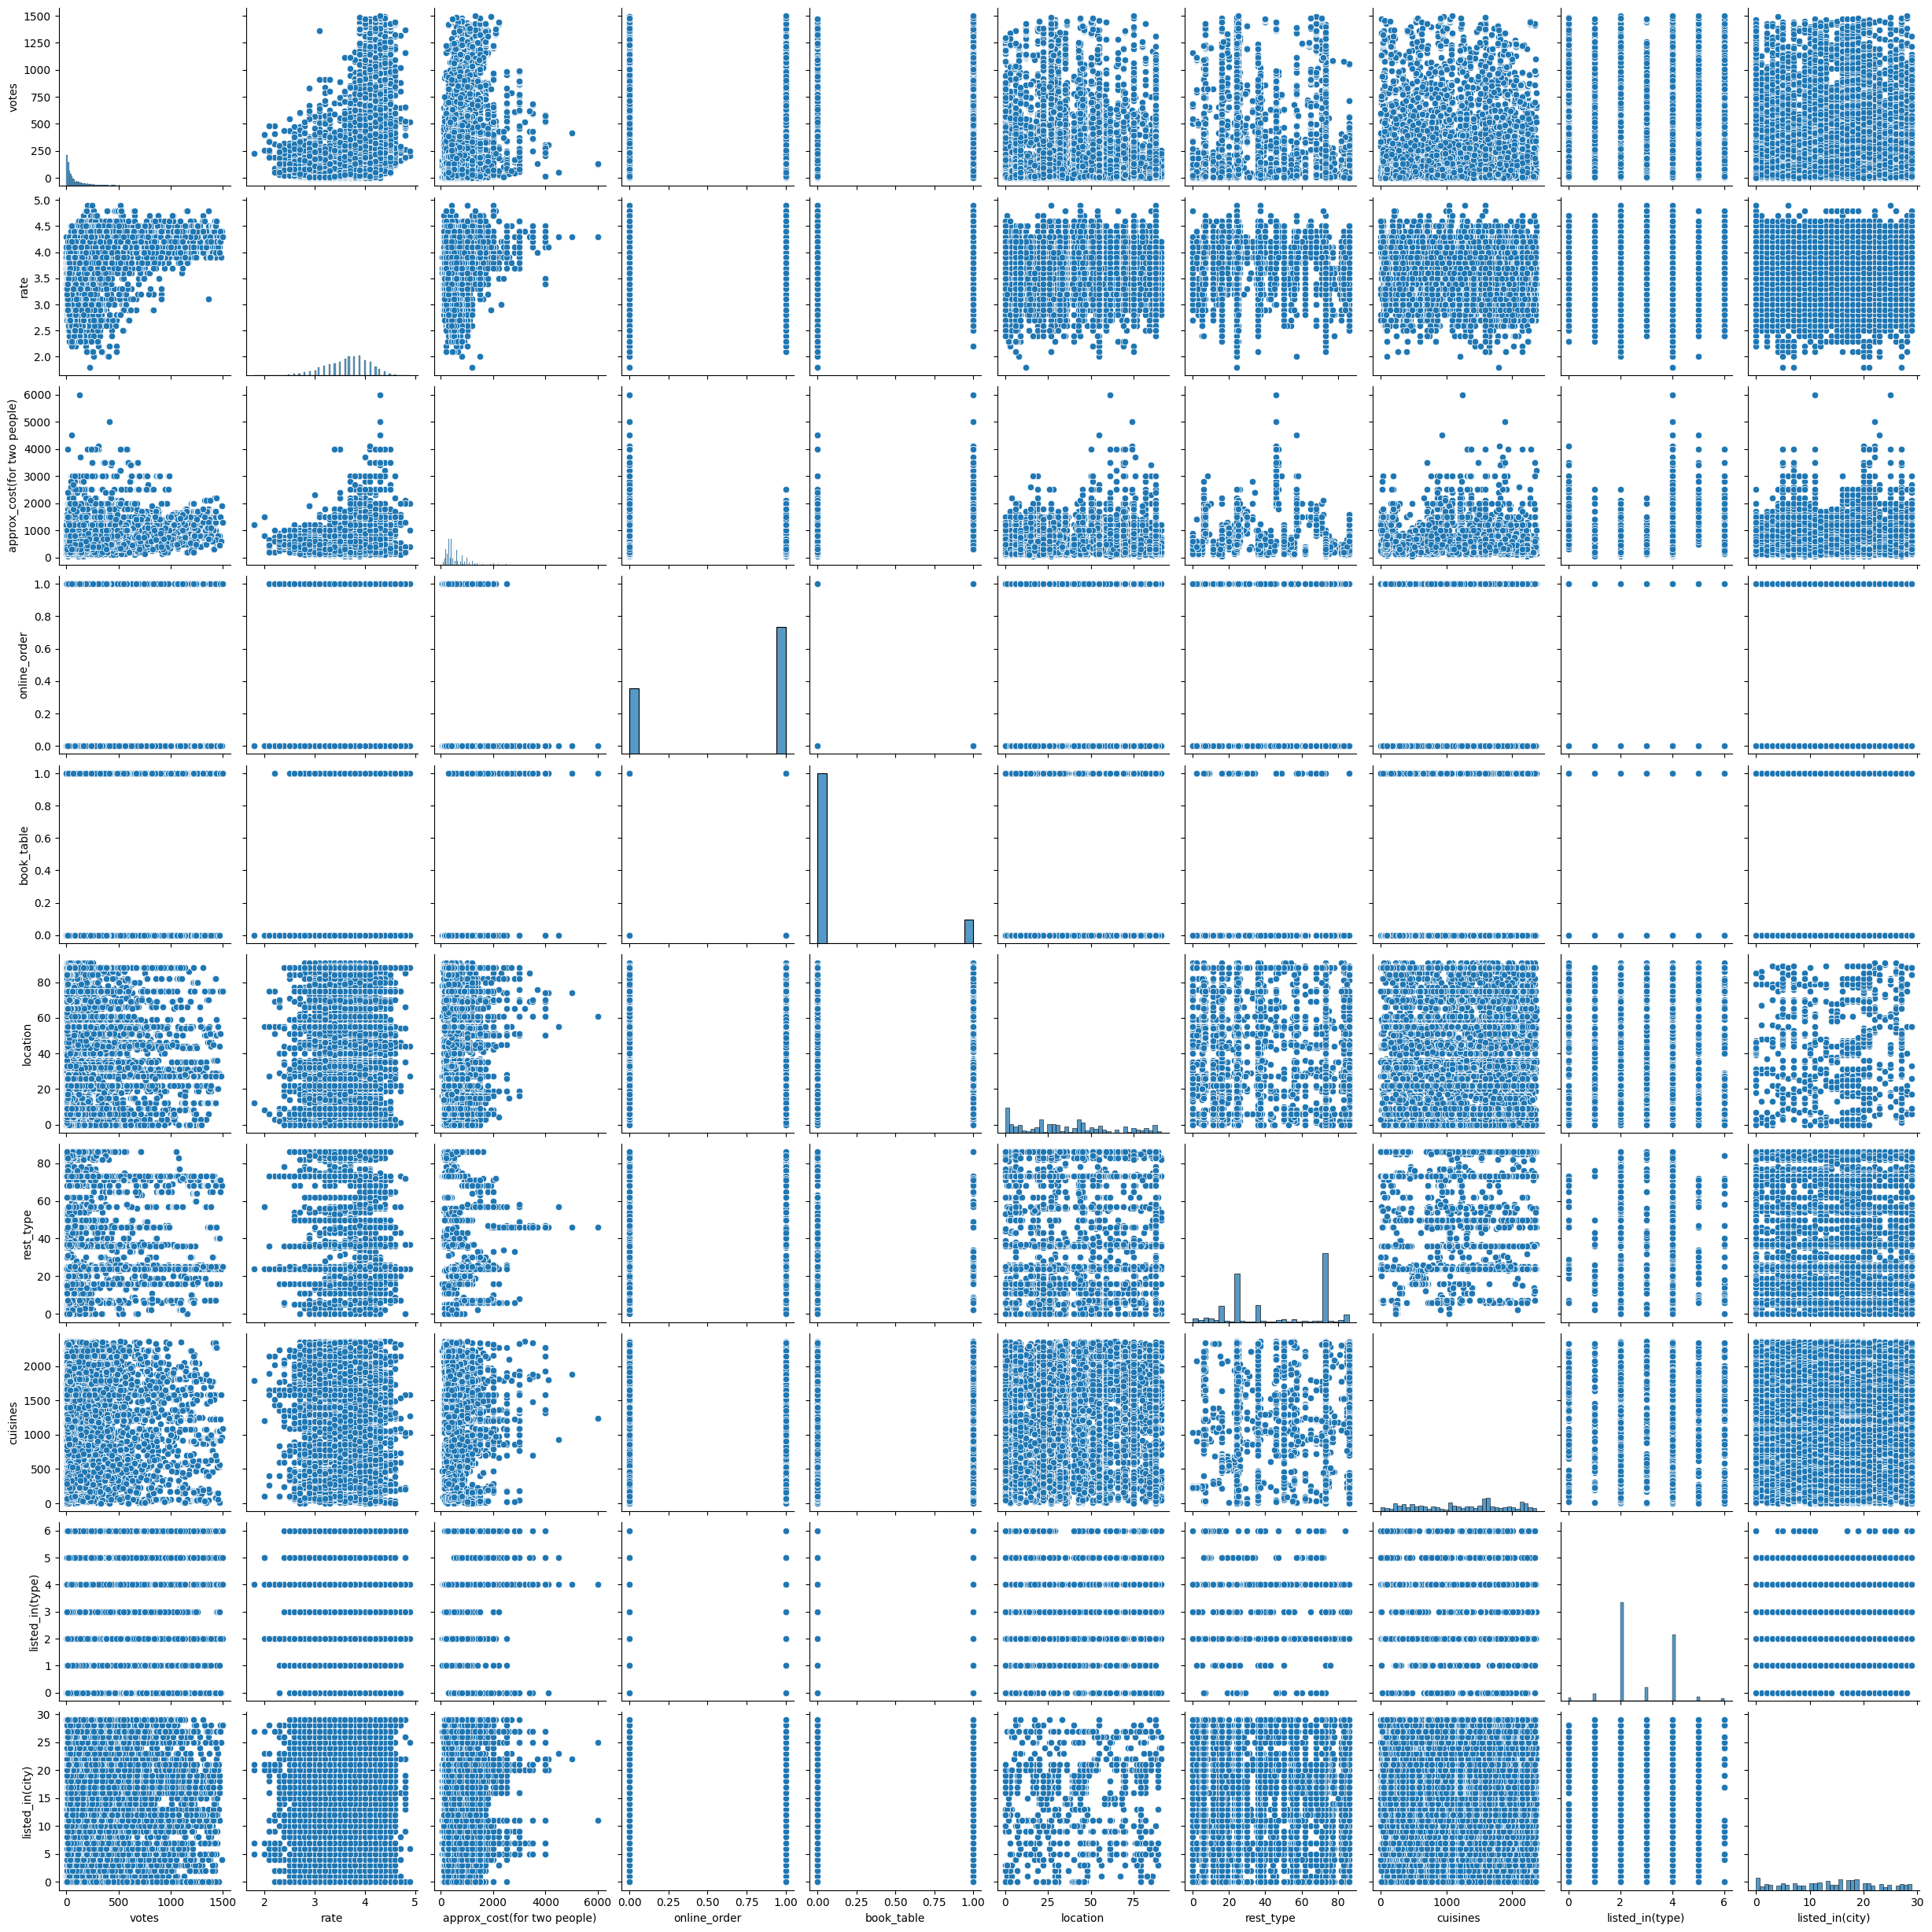

In [12]:
sns.pairplot(df_zomato);

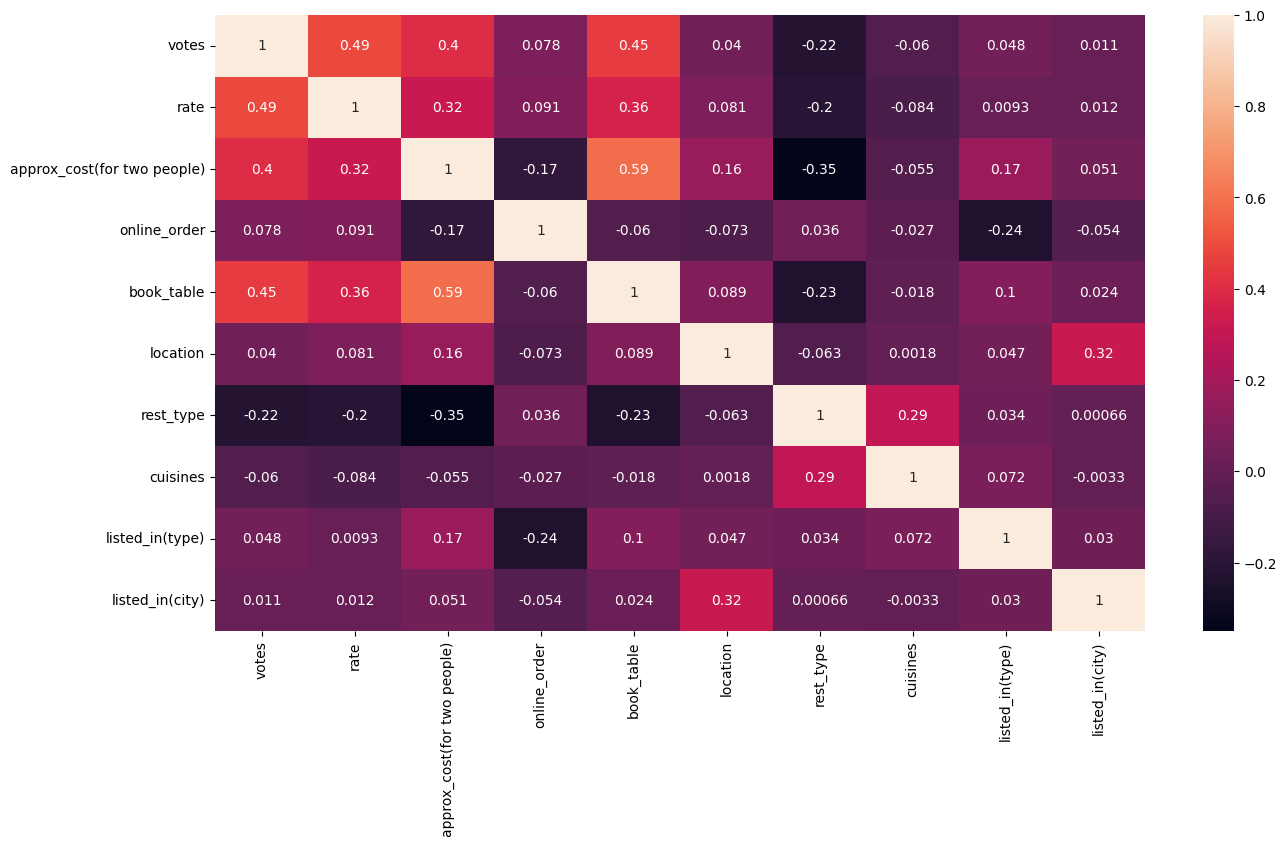

In [13]:
sns.heatmap(df_zomato.corr(),annot=True);

In [14]:
# We can see there are moderate correlation between variables
#(approx_cost(for people) and book table)
# rate and vote
# vote and (approx_cost(for people) 
# and book table)
# book_table and rate
# rest_type and (approx_cost(for people) 
# book table and votes

In [15]:
df_zomato['online_order'].value_counts()

1    25672
0    13249
Name: online_order, dtype: int64

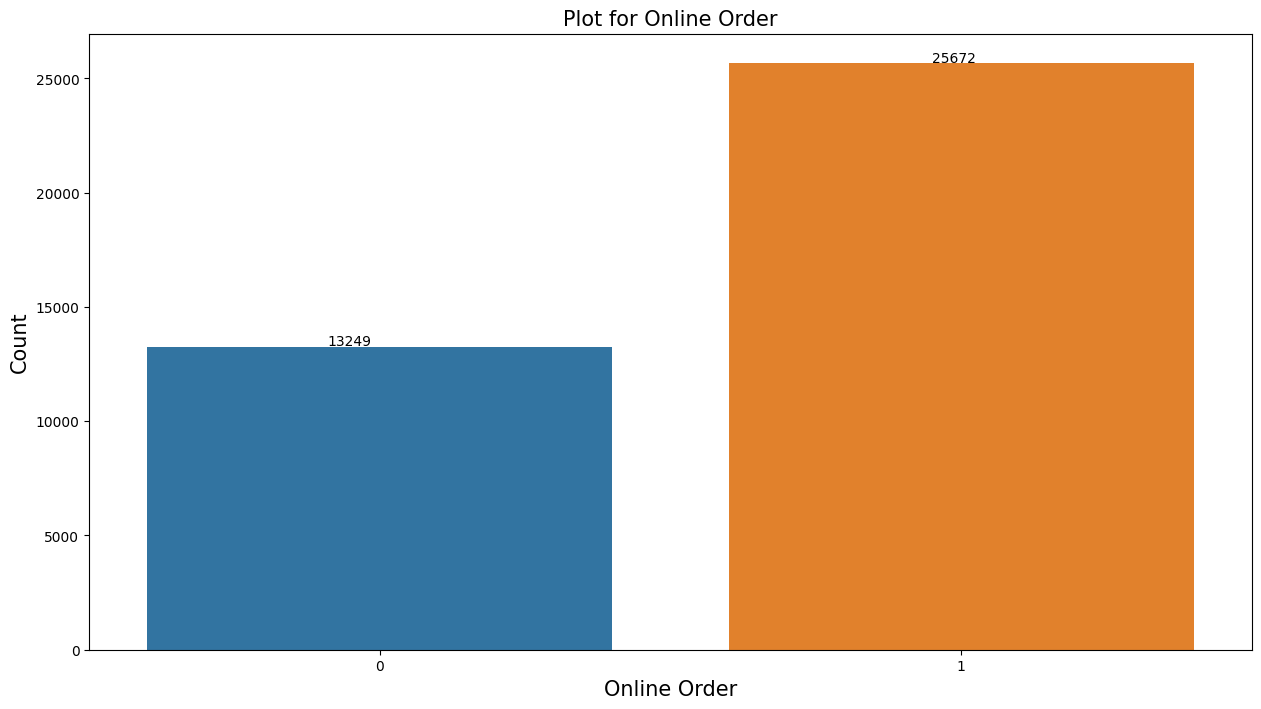

In [16]:
sns.countplot(data=df_zomato,x='online_order')
plt.text(x=-0.09,y=13300,s=str(df_zomato['online_order'].value_counts()[0]))
plt.text(x=0.95,y=25700,s=str(df_zomato['online_order'].value_counts()[1]))
plt.title('Plot for Online Order',fontsize=15)
plt.xlabel('Online Order',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [17]:
# Target columns is fairly balanced so no need to resample.

In [18]:
def plot_with_target(col):
    plt.subplot(1,2,1)
    sns.barplot(data=df_zomato,x='online_order',y=col)
    plt.subplot(1,2,2)
    sns.boxplot(data=df_zomato,y=col, x='online_order',palette='tab10')
    plt.tight_layout()
    plt.ylabel(col,fontsize=15)
    plt.show()

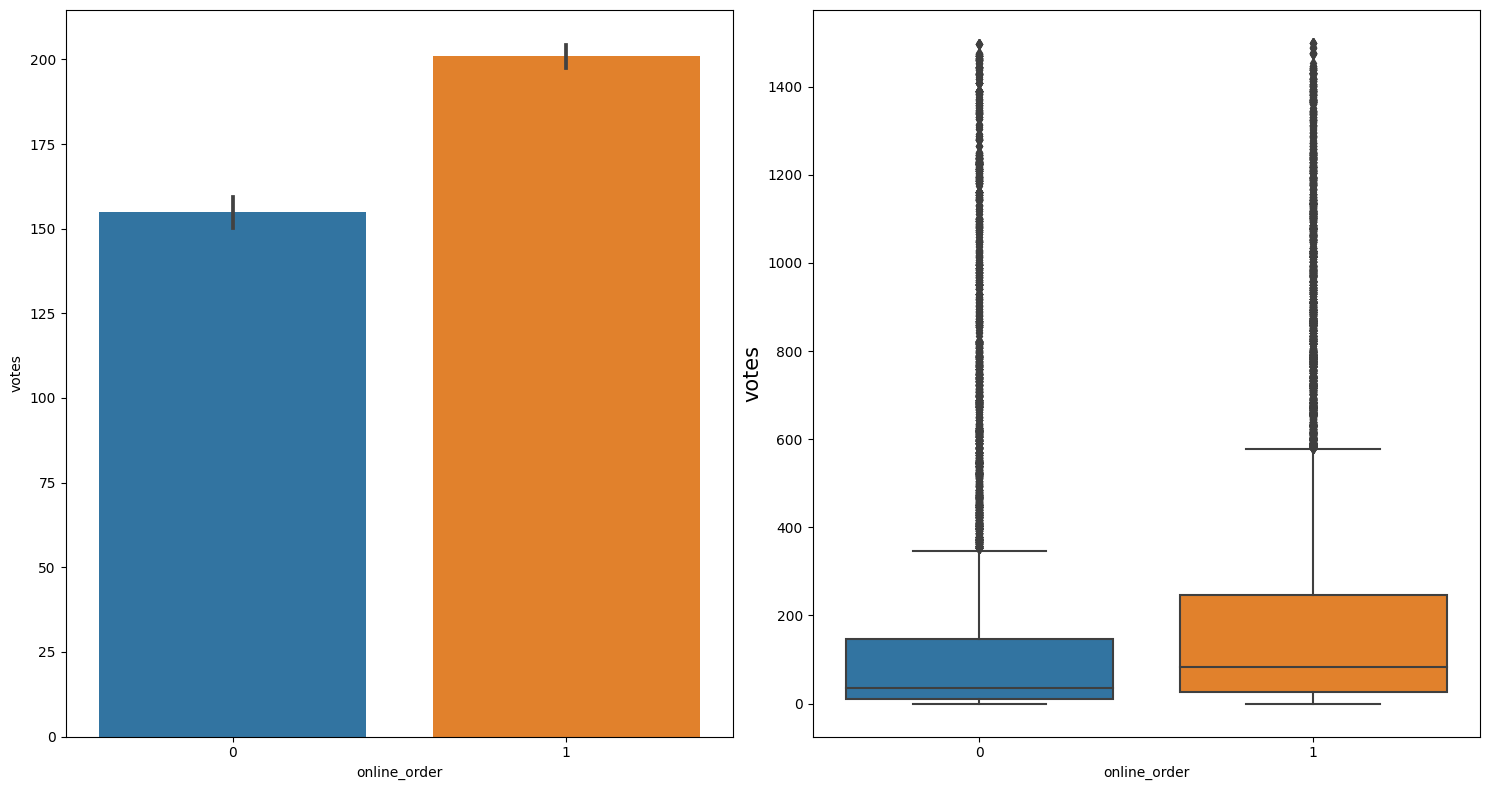

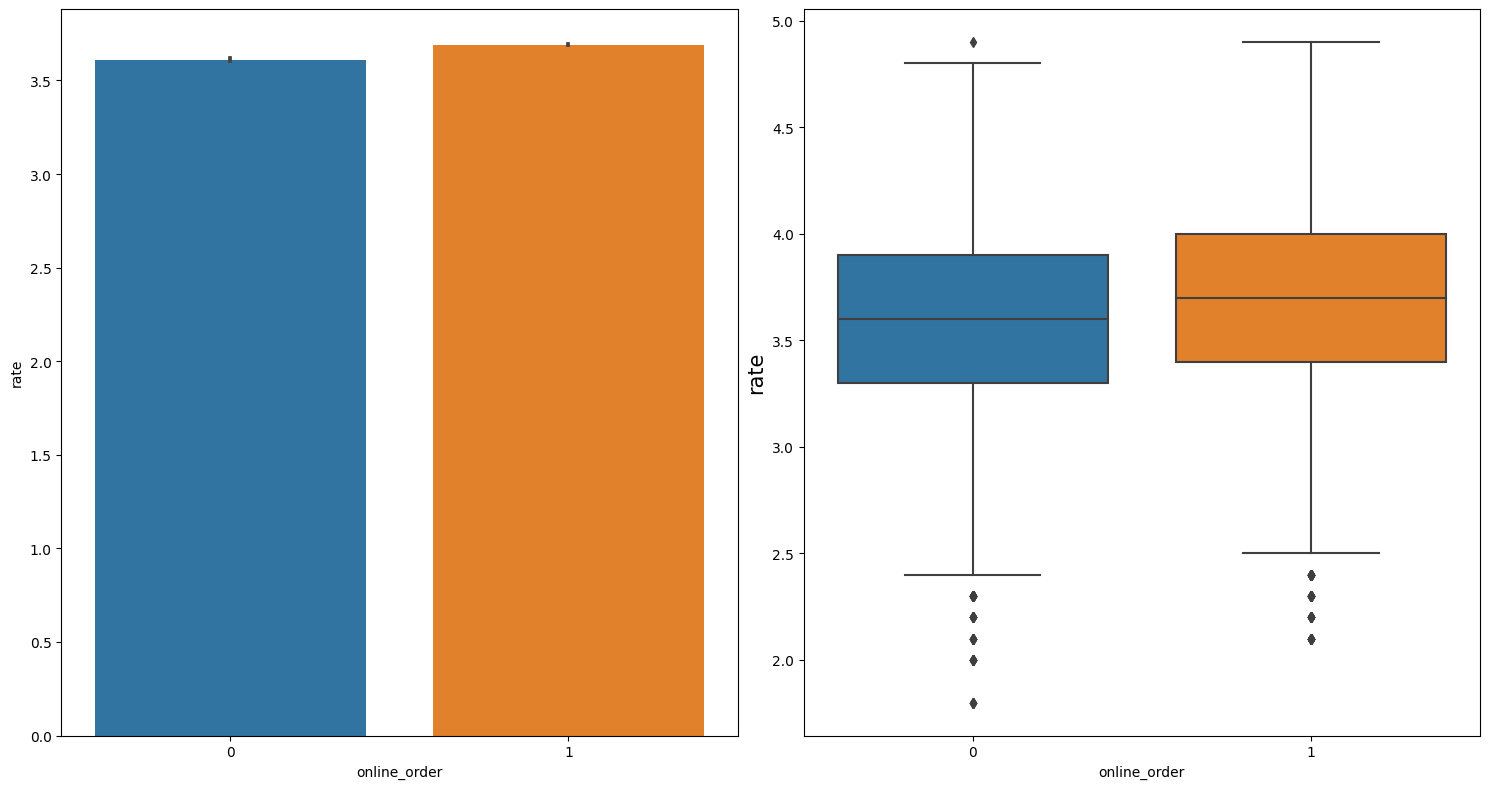

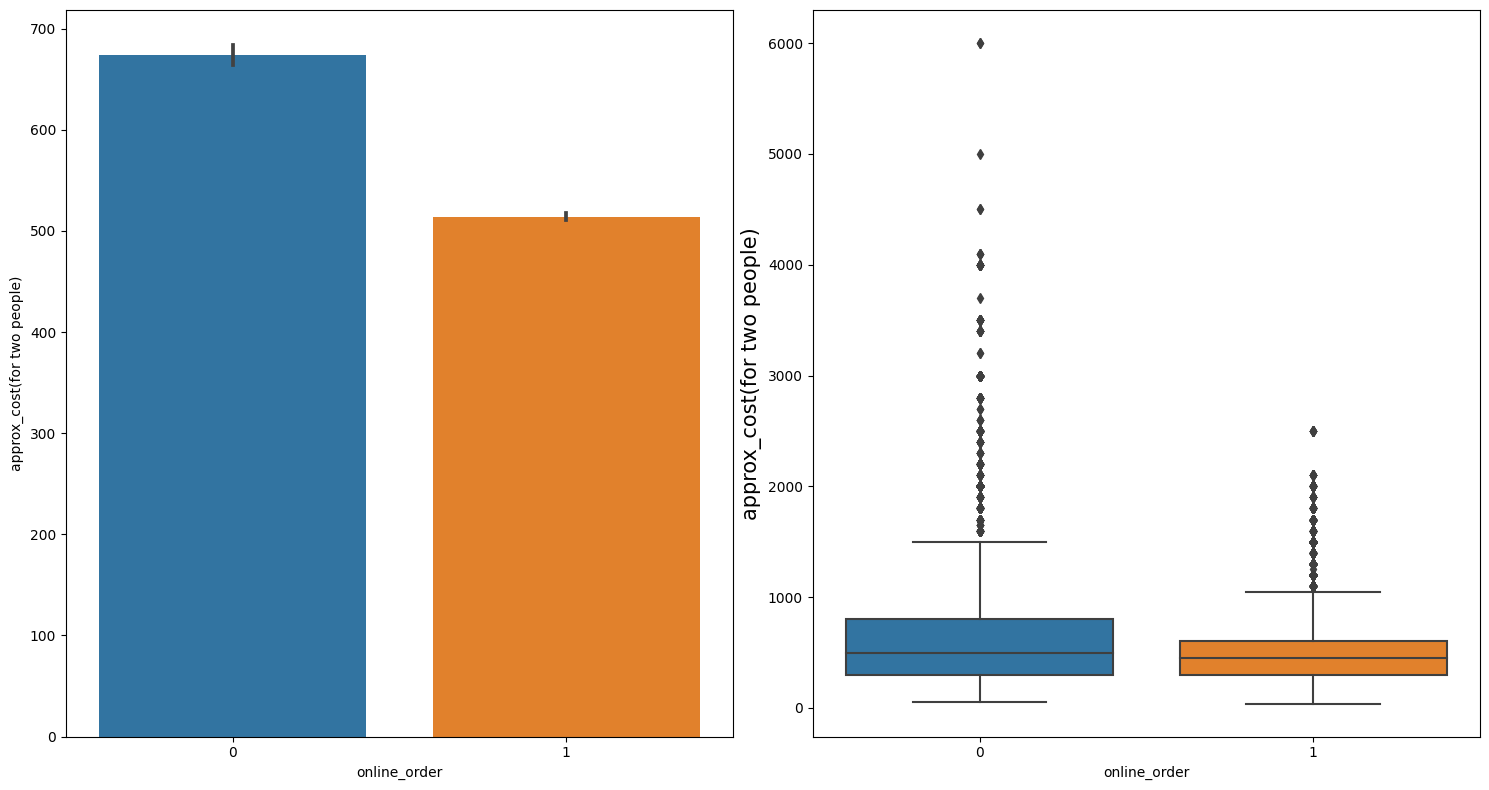

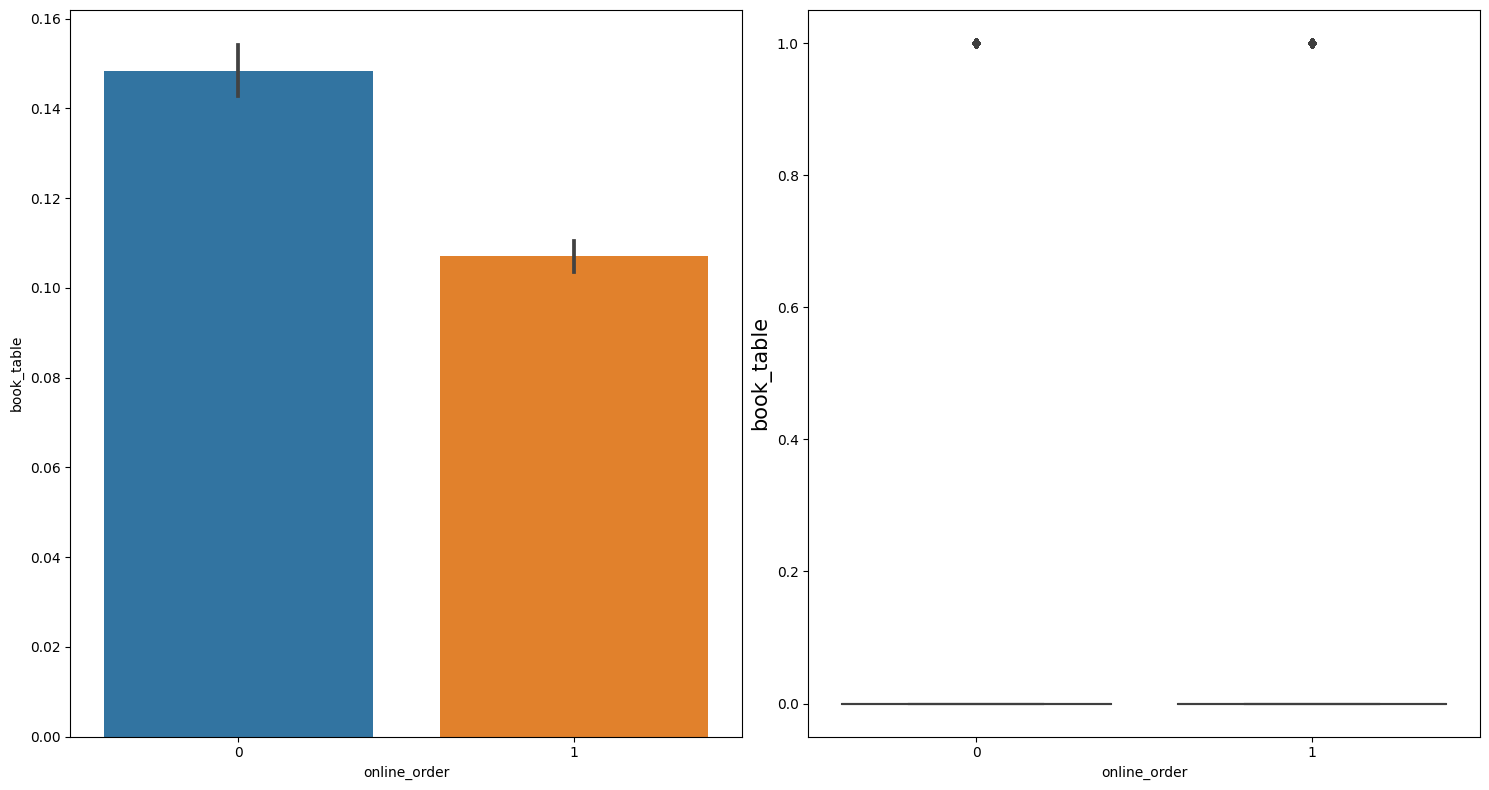

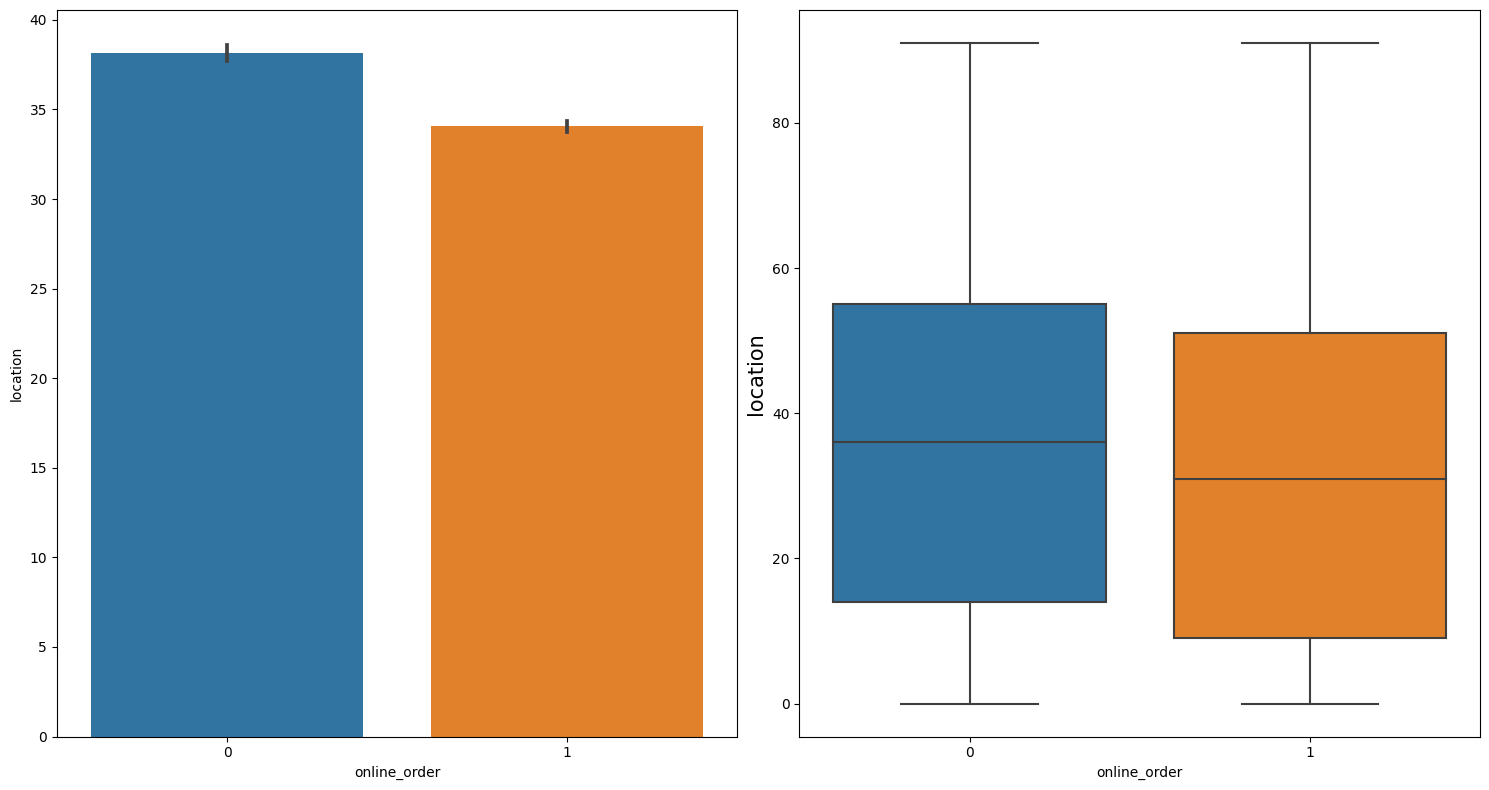

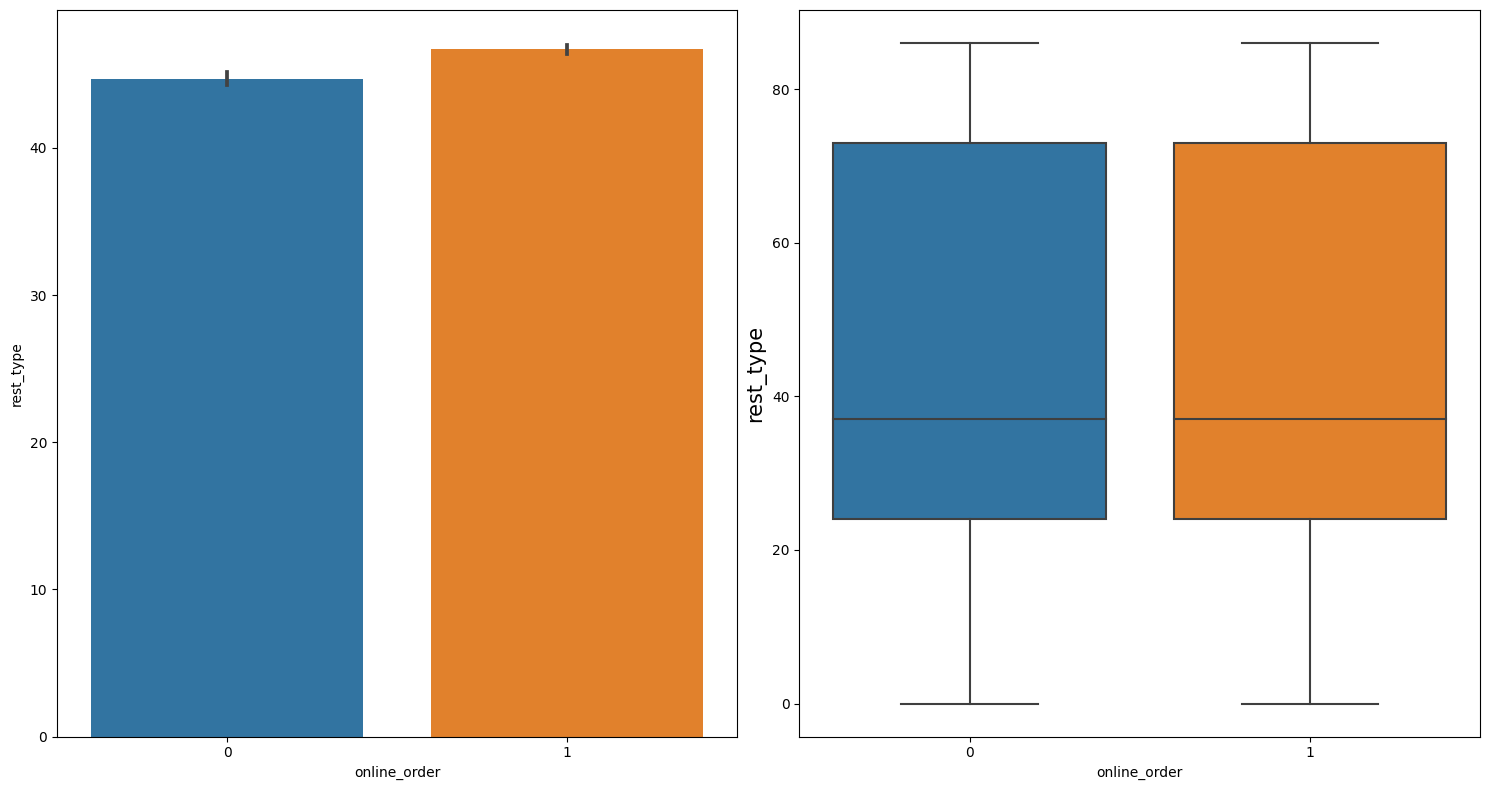

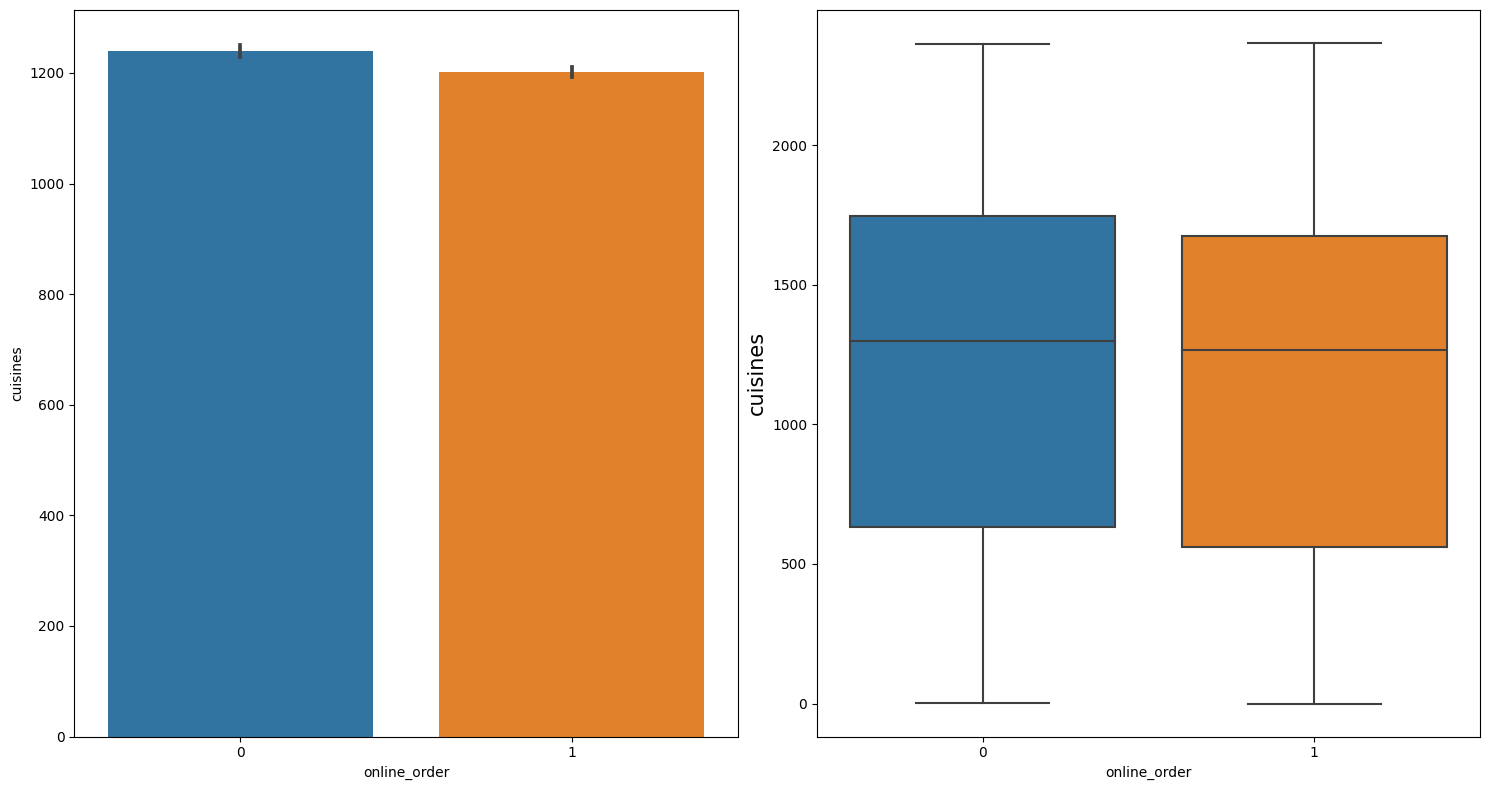

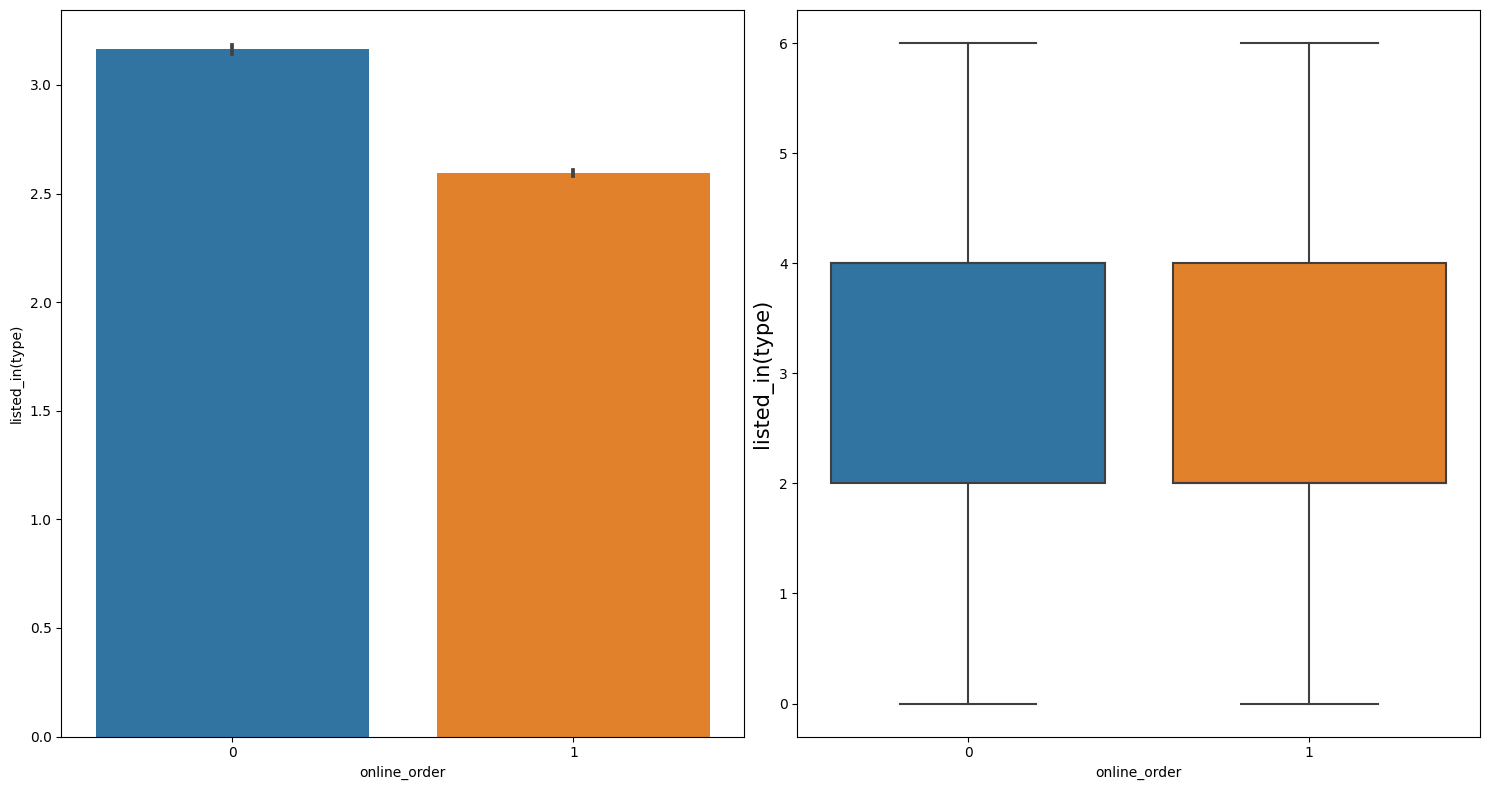

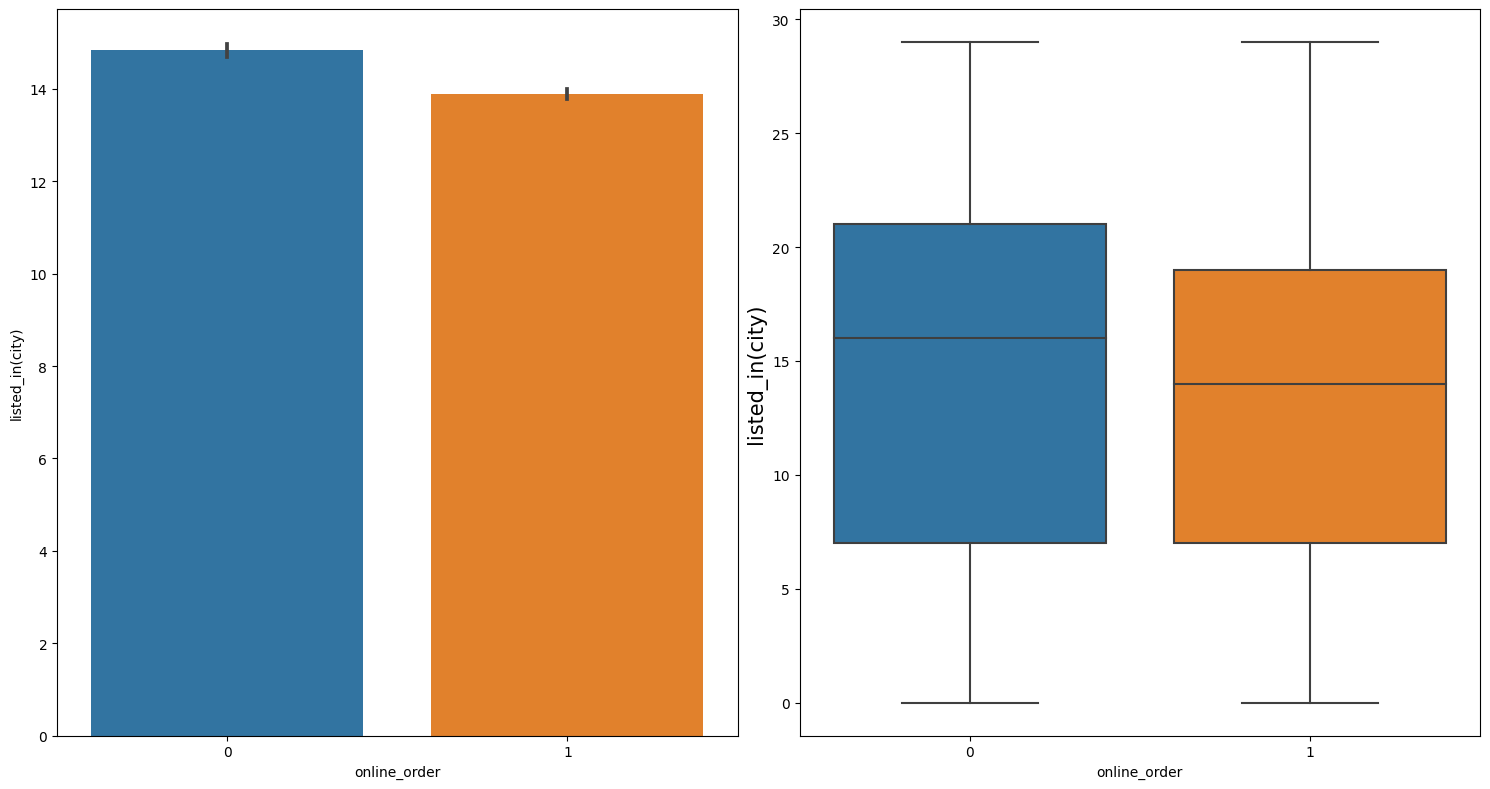

In [19]:
for col in df_zomato.drop(['online_order'],axis=1):
    plot_with_target(col)

In [20]:
X = df_zomato.drop(['online_order'],axis=1)
y = df_zomato['online_order']

In [21]:
X.skew()

votes                          2.330922
rate                          -0.413436
approx_cost(for two people)    2.808578
book_table                     2.321539
location                       0.389684
rest_type                      0.010029
cuisines                      -0.085650
listed_in(type)                0.282065
listed_in(city)               -0.062535
dtype: float64

In [22]:
X_norm = X.copy()
X_norm['votes'] = np.sqrt(X_norm['votes'])
X_norm.skew()

votes                          1.256622
rate                          -0.413436
approx_cost(for two people)    2.808578
book_table                     2.321539
location                       0.389684
rest_type                      0.010029
cuisines                      -0.085650
listed_in(type)                0.282065
listed_in(city)               -0.062535
dtype: float64

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.2,random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31136, 9)
(7785, 9)
(31136,)
(7785,)


In [24]:
scaler = MinMaxScaler()

col = ['votes','rate','location','cuisines','listed_in(city)','rest_type','listed_in(type)','approx_cost(for two people)']

X_train[col] = scaler.fit_transform(X_train[col])

X_train.head(2)

,votes,rate,approx_cost(for two people),book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
19111,0.195001,0.612903,0.077181,0,0.263736,0.418605,0.366019,0.333333,0.517241
31239,0.642606,0.838710,0.161074,1,0.604396,0.290698,0.373626,0.666667,0.793103


In [25]:
def eval_metric(model,X,y):
    y_pred = model.predict(X)
    print('Accuracy Score : ',accuracy_score(y_true=y,y_pred=y_pred))
    print('Recall Score : ',recall_score(y_true=y,y_pred=y_pred))
    print('Precision Score :',precision_score(y_true=y,y_pred=y_pred))
    print('F1 Score : ',f1_score(y_true=y,y_pred=y_pred))
    print("Cohen_kappa_score : ",cohen_kappa_score(y,y_pred))
    print("Roc_auc_score : ",roc_auc_score(y,y_pred))
    print('*************************************************************************')
    print("Confusion Matrix :\n ",confusion_matrix(y_true=y_test,y_pred=y_pred))
    print('*************************************************************************')
    print('Classification Report: \n',classification_report(y_true=y,y_pred=y_pred))

In [26]:
def cross_validate(model,n,X_train,y_train):
    skf = StratifiedKFold(n_splits=5,shuffle=True)
    rfe_rf = RFECV(estimator=model,n_features_to_select=n,importance_getter='auto',cv=skf,scoring='roc_auc')
    rfe_rf.fit(X_train,y_train)

    feat_index_rf = pd.Series(rfe_rf.ranking_,index=X_train.columns)
    signi_feat_rf = feat_index_rf[feat_index_rf==1].index
    X_train_rf = X_train[signi_feat_rf]
    model.fit(X_train_rf,y_train)

    model.fit(X_train_rf,y_train)
    scores_val_score = cross_val_score(estimator=model,
                                   X=X_train_rf,y=y_train,scoring='roc_auc')
    print('Scores : ',scores_val_score)
    print('Average score : ',np.mean(scores_val_score))
    print('Deviation in score : ',np.std(scores_val_score))
    return signi_feat_rf

In [27]:
def plot_confusion_matrix(model,X,y):
    y_pred_tuned = model.predict(X)
    cm =confusion_matrix(y_true=y,y_pred=y_pred_tuned)

    conf_matrix = pd.DataFrame(data=cm,columns=['Predicted Online Order : No','Predicted Online Order : Yes'],
                             index=['Online Order : No','Online Order : Yes'])
    sns.heatmap(data=conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['green']),linewidths=0.2,cbar=False,
            annot_kws={'size':25})

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()

In [28]:
def plot_roc_auc_curve(model,X,y):
    y_pred = model.predict(X)
    fpr,tpr,thresholds = roc_curve(y,y_pred)

    plt.plot([0,1],[0,1],'r--')
    plt.plot(fpr,tpr)

    plt.text(x=0.02,y=0.8,s=('AUC score',round(roc_auc_score(y,y_pred),5)))

    plt.grid(True)
    plt.show()


# Buiding Base model

In [29]:
X_train_sm = sm.add_constant(X_train)
glm = sm.GLM(y_train,X_train_sm).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           online_order   No. Observations:                31136
Model:                            GLM   Df Residuals:                    31126
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.19595
Method:                          IRLS   Log-Likelihood:                -18801.
Date:                Wed, 03 May 2023   Deviance:                       6099.1
Time:                        23:55:05   Pearson chi2:                 6.10e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1370
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.8098      0.016     50.453      0.000       0.778       0.841
votes                           0.4802      0.015     31.546      0.000       0.450       0.510
rate                            0.2017      0.023      8.924      0.000       0.157       0.246
approx_cost(for two people)    -1.4139      0.045    -31.316      0.000      -1.502      -1.325
book_table                     -0.0270      0.010     -2.712      0.007      -0.047      -0.007
location                       -0.0445      0.009     -4.877      0.000      -0.062      -0.027
rest_type                       0.0456      0.009      4.923      0.000       0.027       0.064
cuisines                       -0.0291      0.009     -3.147      0.002      -0.047      -0.011
listed_in(type)                -0.5241      0.014    -38.737      0.000      -0.551      -0.498
listed_in(city)                -0.0502      0.009     -5.439      0.000      -0.068      -0.032
===============================================================================================
"""

In [30]:
y_pred_proba_train = glm.predict(X_train_sm)
ypred_train = [1 if i>0.5 else 0 for i in y_pred_proba_train]
ypred_train[0:5]

[1, 1, 1, 0, 0]

In [31]:
confusion_matrix(y_train,ypred_train)

array([[ 2997,  7624],
       [ 1452, 19063]], dtype=int64)

In [32]:
df_odds = pd.DataFrame(data=glm.params,columns=['Odds'])
df_odds

,Odds
const,0.809753
votes,0.480221
rate,0.201707
approx_cost(for two people),-1.413868
book_table,-0.027011
location,-0.044507
rest_type,0.045591
cuisines,-0.029123
listed_in(type),-0.524144
listed_in(city),-0.050234


In [33]:
# We can see only approx_cost(for two people) has significant effect on target

In [34]:
X_train_sm = sm.add_constant(X_train.drop(['book_table'],axis=1))
glm = sm.GLM(y_train,X_train_sm).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           online_order   No. Observations:                31136
Model:                            GLM   Df Residuals:                    31127
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                         0.19599
Method:                          IRLS   Log-Likelihood:                -18804.
Date:                Wed, 03 May 2023   Deviance:                       6100.5
Time:                        23:55:06   Pearson chi2:                 6.10e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1368
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.8185      0.016     52.043      0.000       0.788       0.849
votes                           0.4720      0.015     31.640      0.000       0.443       0.501
rate                            0.1949      0.022      8.675      0.000       0.151       0.239
approx_cost(for two people)    -1.4687      0.040    -36.388      0.000      -1.548      -1.390
location                       -0.0445      0.009     -4.873      0.000      -0.062      -0.027
rest_type                       0.0460      0.009      4.962      0.000       0.028       0.064
cuisines                       -0.0302      0.009     -3.271      0.001      -0.048      -0.012
listed_in(type)                -0.5249      0.014    -38.802      0.000      -0.551      -0.498
listed_in(city)                -0.0502      0.009     -5.432      0.000      -0.068      -0.032
===============================================================================================
"""

In [35]:
X_train_sm = sm.add_constant(X_train.drop(['book_table','cuisines'],axis=1))
glm = sm.GLM(y_train,X_train_sm).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           online_order   No. Observations:                31136
Model:                            GLM   Df Residuals:                    31128
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                         0.19605
Method:                          IRLS   Log-Likelihood:                -18810.
Date:                Wed, 03 May 2023   Deviance:                       6102.6
Time:                        23:55:06   Pearson chi2:                 6.10e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1364
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.8072      0.015     52.589      0.000       0.777       0.837
votes                           0.4707      0.015     31.561      0.000       0.441       0.500
rate                            0.1984      0.022      8.841      0.000       0.154       0.242
approx_cost(for two people)    -1.4737      0.040    -36.529      0.000      -1.553      -1.395
location                       -0.0450      0.009     -4.933      0.000      -0.063      -0.027
rest_type                       0.0375      0.009      4.219      0.000       0.020       0.055
listed_in(type)                -0.5274      0.014    -39.038      0.000      -0.554      -0.501
listed_in(city)                -0.0497      0.009     -5.377      0.000      -0.068      -0.032
===============================================================================================
"""

In [36]:
# Preparing data for test 

In [37]:
col = ['votes','rate','location','cuisines','listed_in(city)','rest_type','listed_in(type)','approx_cost(for two people)']

X_test[col] = scaler.fit_transform(X_test[col])

X_test.head(2)

,votes,rate,approx_cost(for two people),book_table,location,rest_type,cuisines,listed_in(type),listed_in(city)
2883,0.057754,0.483871,0.076355,0,0.142857,0.848837,0.728849,0.666667,0.103448
14710,0.370709,0.709677,0.162562,1,0.318681,0.848837,0.861675,0.333333,0.448276


In [38]:
log = LogisticRegression()
log.fit(X_train,y_train)
eval_metric(log,X_test,y_test)

Accuracy Score :  0.696082209377007
Recall Score :  0.8369206903238317
Precision Score : 0.738914569423044
F1 Score :  0.7848699763593381
Cohen_kappa_score :  0.27412604575872757
Roc_auc_score :  0.6283157485104698
*************************************************************************
Confusion Matrix :
  [[1103 1525]
 [ 841 4316]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.42      0.48      2628
           1       0.74      0.84      0.78      5157

    accuracy                           0.70      7785
   macro avg       0.65      0.63      0.63      7785
weighted avg       0.68      0.70      0.68      7785



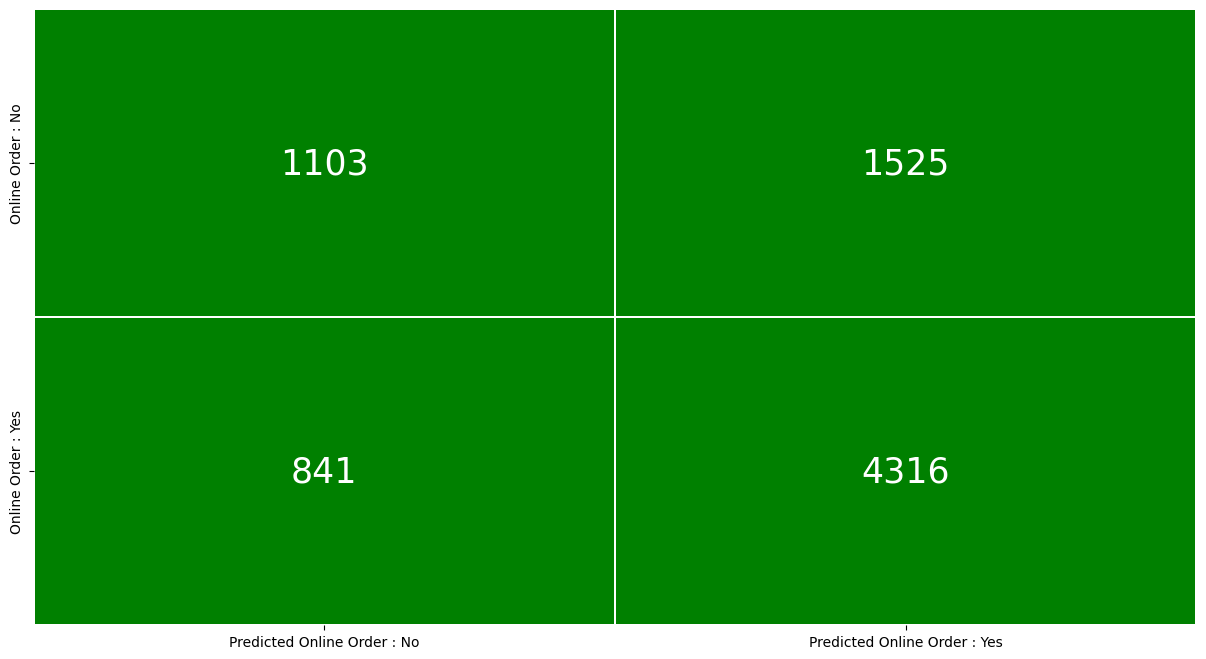

In [39]:
plot_confusion_matrix(log,X_test,y_test)

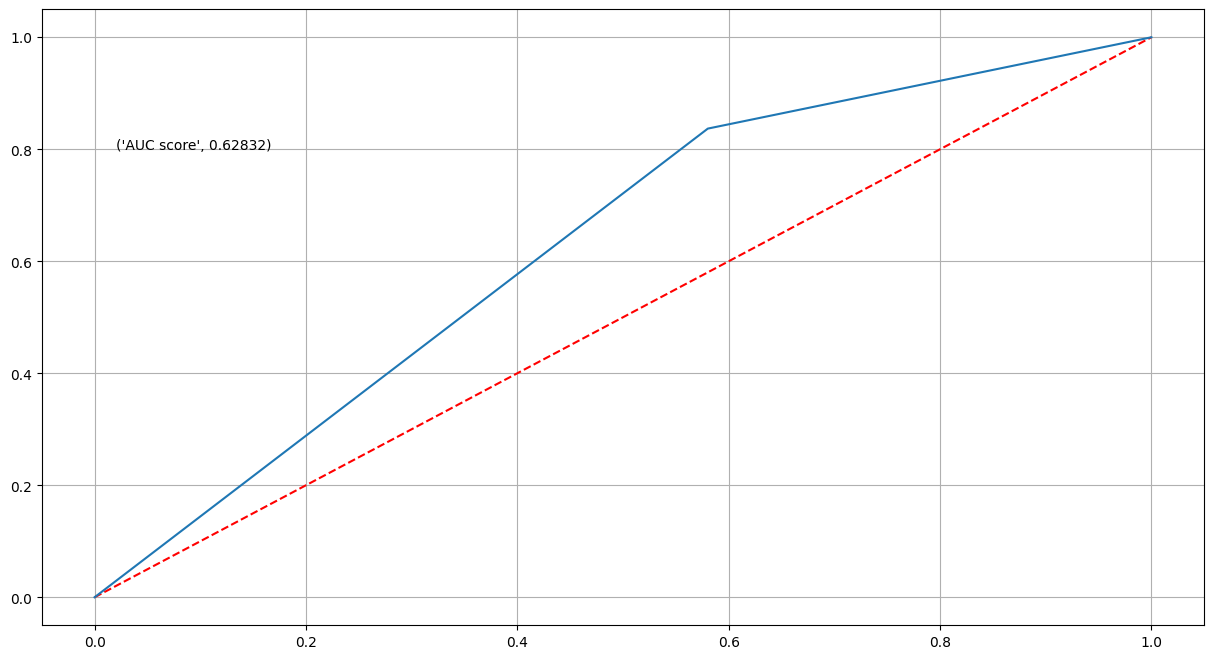

In [40]:
plot_roc_auc_curve(log,X_test,y_test)

In [41]:
# We can see that roc_auc score is 60 which is not good

In [42]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)
eval_metric(dt,X_test,y_test)

Accuracy Score :  0.7556840077071291
Recall Score :  0.7841768470040721
Precision Score : 0.8367473618870267
F1 Score :  0.8096096096096097
Cohen_kappa_score :  0.4697479511604612
Roc_auc_score :  0.7419742682508944
*************************************************************************
Confusion Matrix :
  [[1839  789]
 [1113 4044]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.70      0.66      2628
           1       0.84      0.78      0.81      5157

    accuracy                           0.76      7785
   macro avg       0.73      0.74      0.73      7785
weighted avg       0.76      0.76      0.76      7785



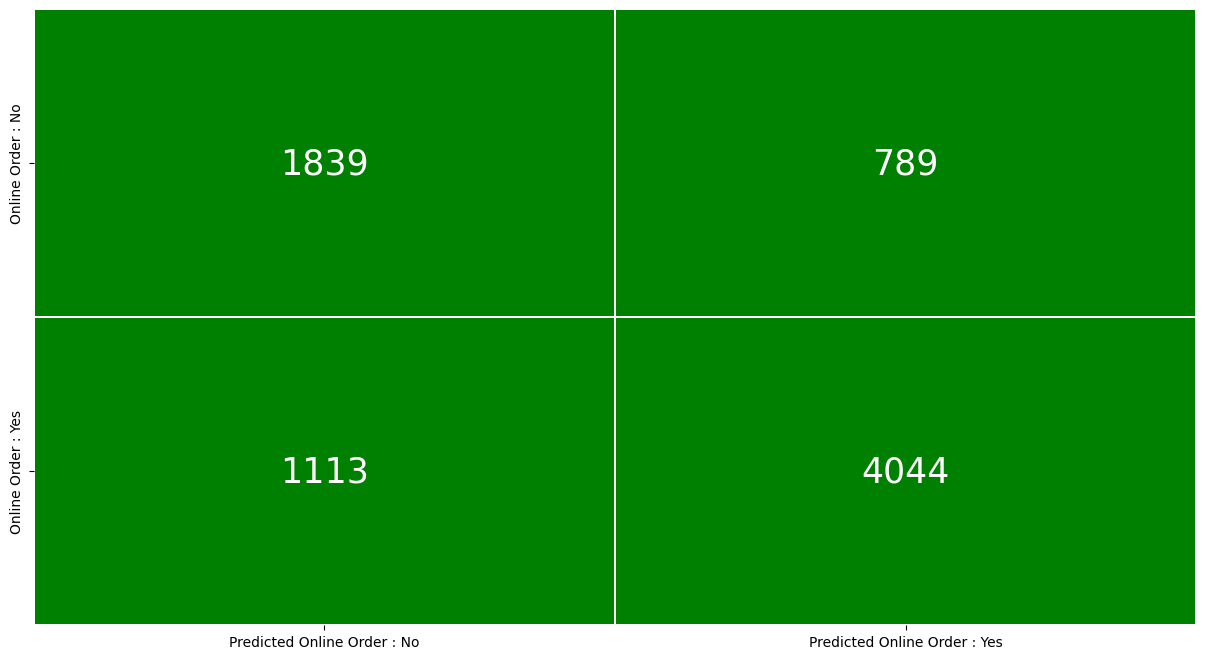

In [43]:
plot_confusion_matrix(dt,X_test,y_test)

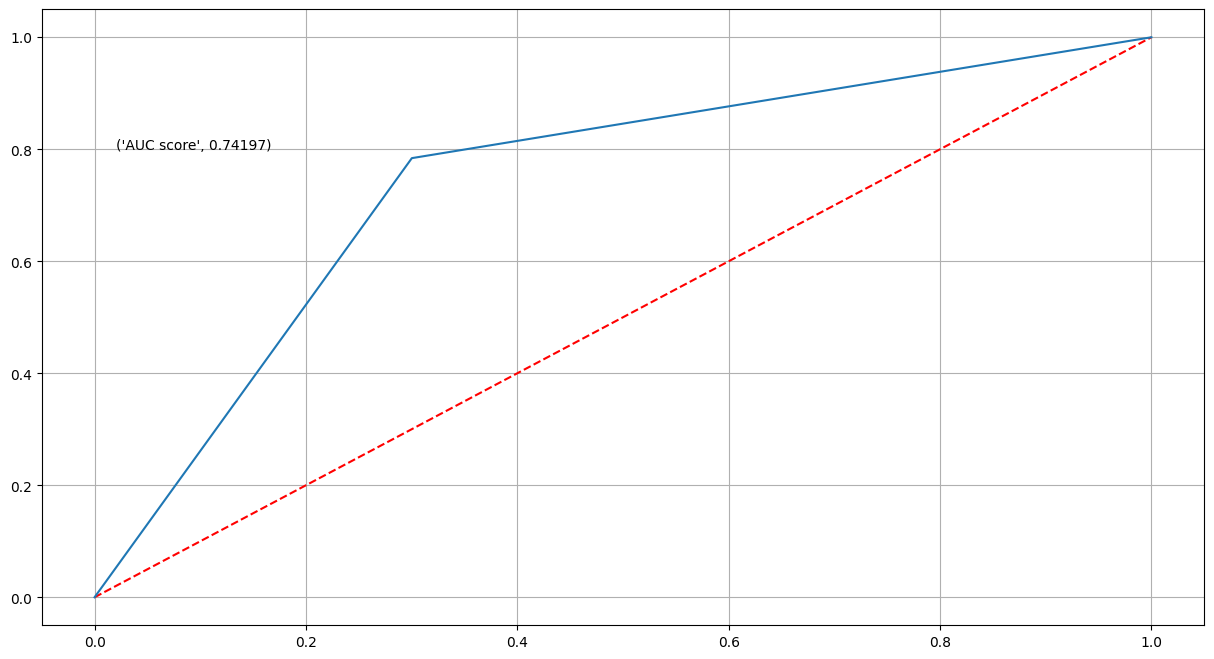

In [44]:
plot_roc_auc_curve(dt,X_test,y_test)

In [45]:
# Decision Tree performs better in term of precision but logistic regression work better in recall

In [46]:
# Let try Bagging algorithm and see we can improve the model further.

# Bagging

In [47]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train,y_train)
eval_metric(rf,X_test,y_test)

Accuracy Score :  0.8285163776493256
Recall Score :  0.8801628853984875
Precision Score : 0.8635844748858448
F1 Score :  0.8717948717948719
Cohen_kappa_score :  0.6129940691096023
Roc_auc_score :  0.8036659175850887
*************************************************************************
Confusion Matrix :
  [[1911  717]
 [ 618 4539]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      2628
           1       0.86      0.88      0.87      5157

    accuracy                           0.83      7785
   macro avg       0.81      0.80      0.81      7785
weighted avg       0.83      0.83      0.83      7785



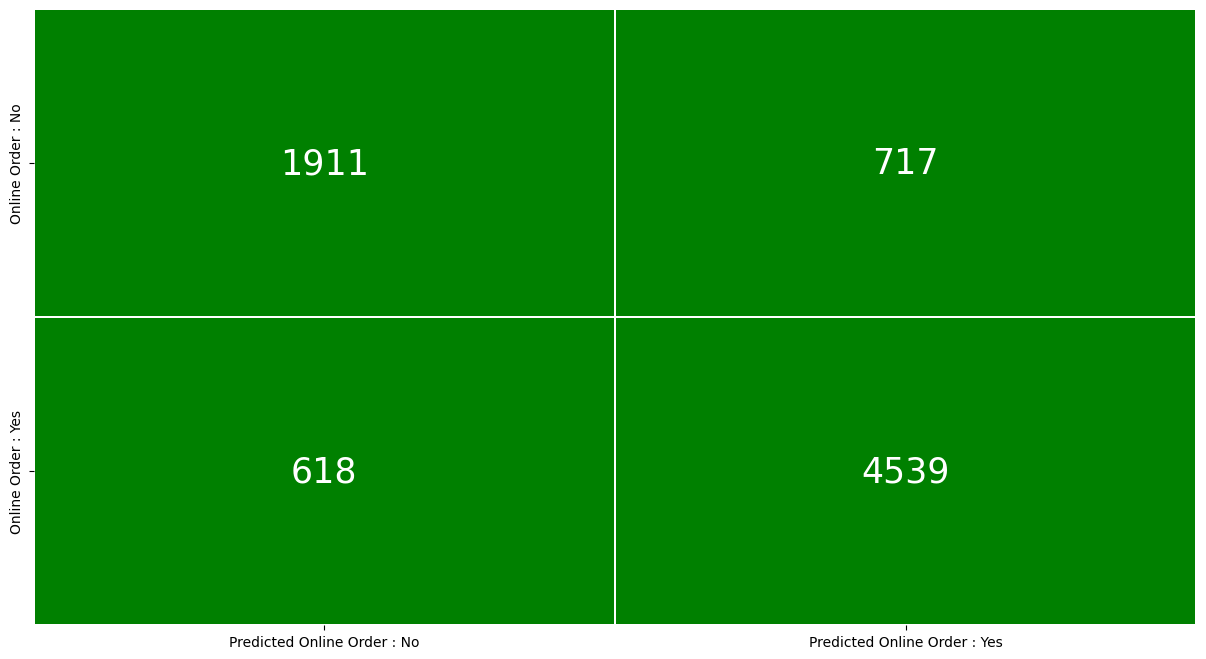

In [48]:
plot_confusion_matrix(rf,X_test,y_test)

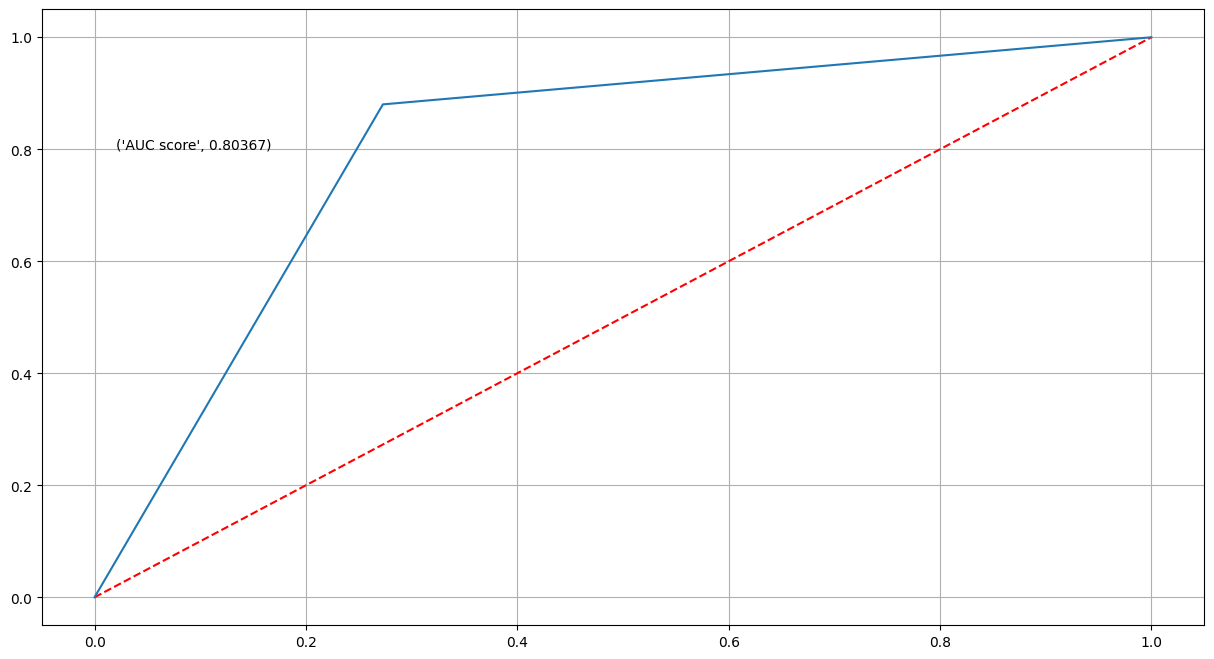

In [49]:
plot_roc_auc_curve(rf,X_test,y_test)

In [50]:
bg = BaggingClassifier(random_state=10)
bg.fit(X_train,y_train)
eval_metric(bg,X_test,y_test)

Accuracy Score :  0.8109184328837508
Recall Score :  0.832072910606942
Precision Score : 0.8762507657749643
F1 Score :  0.8535906107022081
Cohen_kappa_score :  0.5872337059623671
Roc_auc_score :  0.800739651650503
*************************************************************************
Confusion Matrix :
  [[2022  606]
 [ 866 4291]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      2628
           1       0.88      0.83      0.85      5157

    accuracy                           0.81      7785
   macro avg       0.79      0.80      0.79      7785
weighted avg       0.82      0.81      0.81      7785



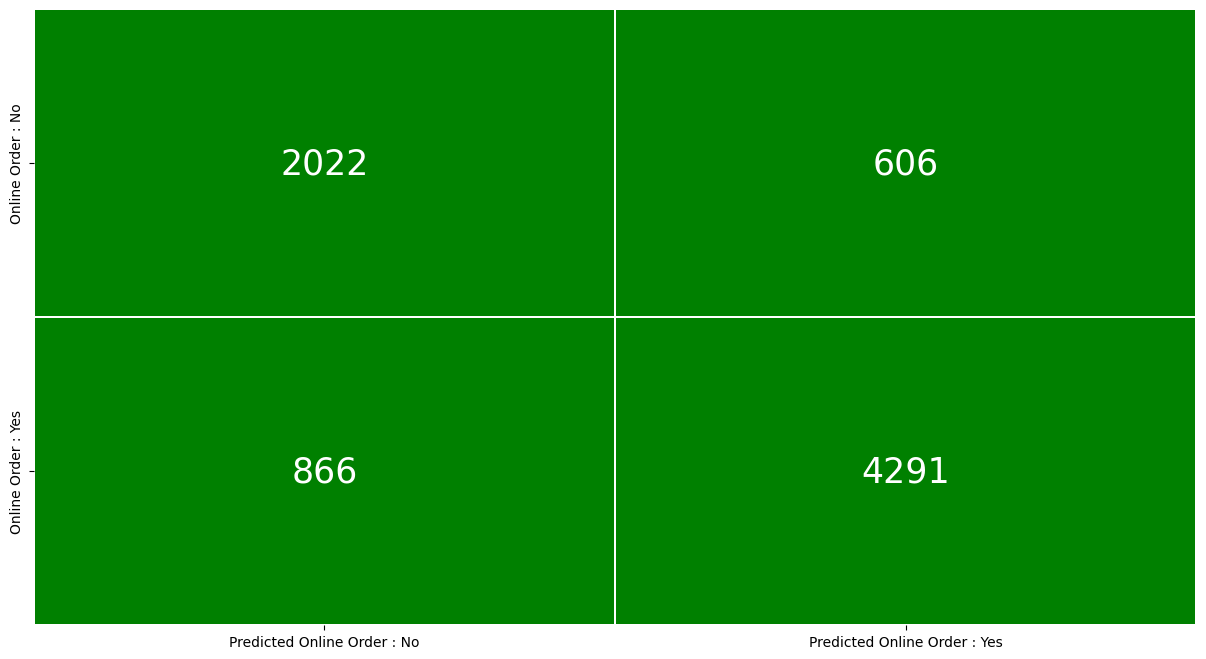

In [51]:
plot_confusion_matrix(bg,X_test,y_test)

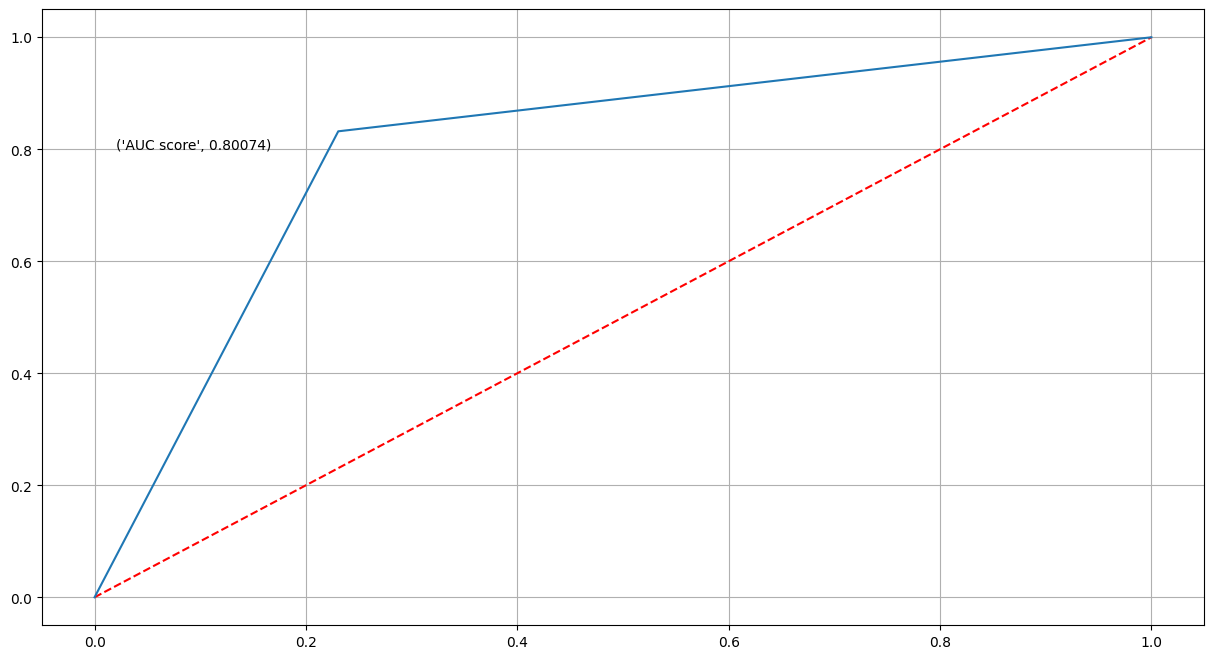

In [52]:
plot_roc_auc_curve(bg,X_test,y_test)

In [53]:
# Random forest perform better in term recall while bagging classifier works better in precision

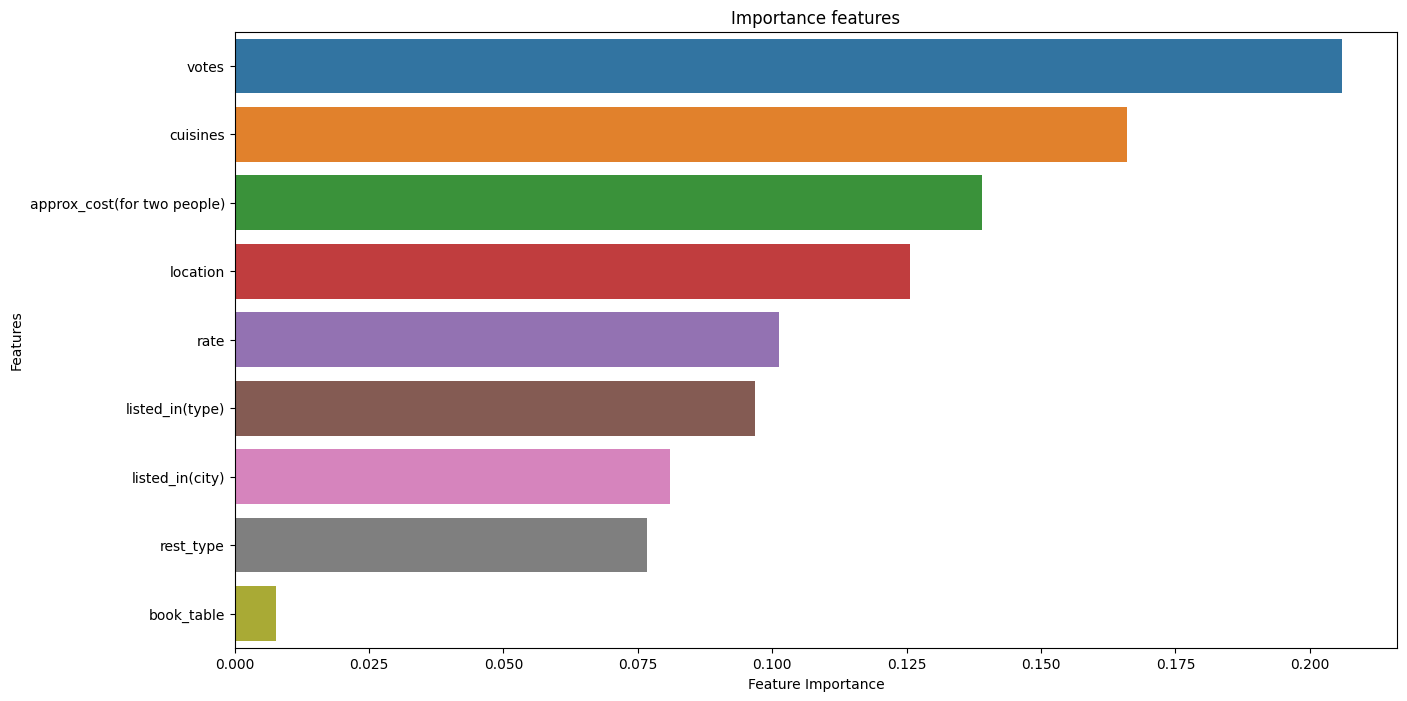

In [54]:
df_feature_importance = pd.DataFrame({'Features':X_train.columns,
                                      'Feature Importance':rf.feature_importances_})
df_feature_importance = df_feature_importance.sort_values(by='Feature Importance',ascending=False)
sns.barplot(data=df_feature_importance,x='Feature Importance',y='Features')
plt.title('Importance features')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [55]:
# We can see that votes,cusines,approx_cost(for two people),location are top features 
# book table is least important features 

In [56]:
X_train.columns

Index(['votes', 'rate', 'approx_cost(for two people)', 'book_table',
       'location', 'rest_type', 'cuisines', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [57]:
X_train_signi = X_train.drop(['book_table'],axis=1)
X_test_signi = X_test.drop(['book_table'],axis=1)
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_signi,y_train)
eval_metric(rf,X_test_signi,y_test)

Accuracy Score :  0.8253050738599872
Recall Score :  0.8842350203606748
Precision Score : 0.856659778320496
F1 Score :  0.8702290076335877
Cohen_kappa_score :  0.6032433941913807
Roc_auc_score :  0.7969500824786631
*************************************************************************
Confusion Matrix :
  [[1865  763]
 [ 597 4560]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.73      2628
           1       0.86      0.88      0.87      5157

    accuracy                           0.83      7785
   macro avg       0.81      0.80      0.80      7785
weighted avg       0.82      0.83      0.82      7785



In [58]:
X_train_signi = X_train.drop(['book_table','rest_type'],axis=1)
X_test_signi = X_test.drop(['book_table','rest_type'],axis=1)
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_signi,y_train)
eval_metric(rf,X_test_signi,y_test)

Accuracy Score :  0.7993577392421323
Recall Score :  0.8524335854178786
Precision Score : 0.8458726188185491
F1 Score :  0.8491404288197797
Cohen_kappa_score :  0.549690579540122
Roc_auc_score :  0.7738195324349667
*************************************************************************
Confusion Matrix :
  [[1827  801]
 [ 761 4396]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.70      0.70      2628
           1       0.85      0.85      0.85      5157

    accuracy                           0.80      7785
   macro avg       0.78      0.77      0.77      7785
weighted avg       0.80      0.80      0.80      7785



In [59]:
# We cannot able to improve the model performance after selecting only important features and let's try boosting algorithm

# Boosting

In [60]:
ada = AdaBoostClassifier(random_state=10)
ada.fit(X_train,y_train)
eval_metric(ada,X_test,y_test)

Accuracy Score :  0.725626204238921
Recall Score :  0.8283885980221058
Precision Score : 0.7734926670287887
F1 Score :  0.7999999999999999
Cohen_kappa_score :  0.36481940236011445
Roc_auc_score :  0.676180600380916
*************************************************************************
Confusion Matrix :
  [[1377 1251]
 [ 885 4272]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.52      0.56      2628
           1       0.77      0.83      0.80      5157

    accuracy                           0.73      7785
   macro avg       0.69      0.68      0.68      7785
weighted avg       0.72      0.73      0.72      7785



In [61]:
gbb = GradientBoostingClassifier(random_state=10)
gbb.fit(X_train,y_train)
eval_metric(gbb,X_test,y_test)

Accuracy Score :  0.7424534360950545
Recall Score :  0.8549544308706613
Precision Score : 0.778150370631839
F1 Score :  0.8147463734639194
Cohen_kappa_score :  0.3954230879306324
Roc_auc_score :  0.6883219642937781
*************************************************************************
Confusion Matrix :
  [[1371 1257]
 [ 748 4409]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.52      0.58      2628
           1       0.78      0.85      0.81      5157

    accuracy                           0.74      7785
   macro avg       0.71      0.69      0.70      7785
weighted avg       0.73      0.74      0.73      7785



In [62]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train,y_train)
eval_metric(xgb,X_test,y_test)

Accuracy Score :  0.8070648683365447
Recall Score :  0.8671708357572232
Precision Score : 0.8455284552845529
F1 Score :  0.8562129044610376
Cohen_kappa_score :  0.5632247202645334
Roc_auc_score :  0.7781440175741976
*************************************************************************
Confusion Matrix :
  [[1811  817]
 [ 685 4472]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.69      0.71      2628
           1       0.85      0.87      0.86      5157

    accuracy                           0.81      7785
   macro avg       0.79      0.78      0.78      7785
weighted avg       0.81      0.81      0.81      7785



In [63]:
# We can see that Boosting algorithm didn't help much so we will try stacking algorithm

# Stacking

In [64]:
base_learners = [('Random Forest',RandomForestClassifier(random_state=10)),
                ('Decision Tree',DecisionTreeClassifier(random_state=3)),
                ('Ada Boosting',AdaBoostClassifier(random_state=2)),
                ('Gradient Boosting',GradientBoostingClassifier(random_state=3)),
                ('XGB Boosting',XGBClassifier(random_state=1))]

#  {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}
skf = StratifiedKFold(n_splits=10)
stack_gb = StackingClassifier(estimators=base_learners,final_estimator=LogisticRegression(random_state=20)
                              ,cv=skf)
stack_gb.fit(X_train,y_train)
eval_metric(stack_gb,X_test,y_test)

Accuracy Score :  0.8488118175979448
Recall Score :  0.8795811518324608
Precision Score : 0.8908091123330715
F1 Score :  0.8851595277588058
Cohen_kappa_score :  0.6639865370848987
Roc_auc_score :  0.8340067098583918
*************************************************************************
Confusion Matrix :
  [[2072  556]
 [ 621 4536]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      2628
           1       0.89      0.88      0.89      5157

    accuracy                           0.85      7785
   macro avg       0.83      0.83      0.83      7785
weighted avg       0.85      0.85      0.85      7785



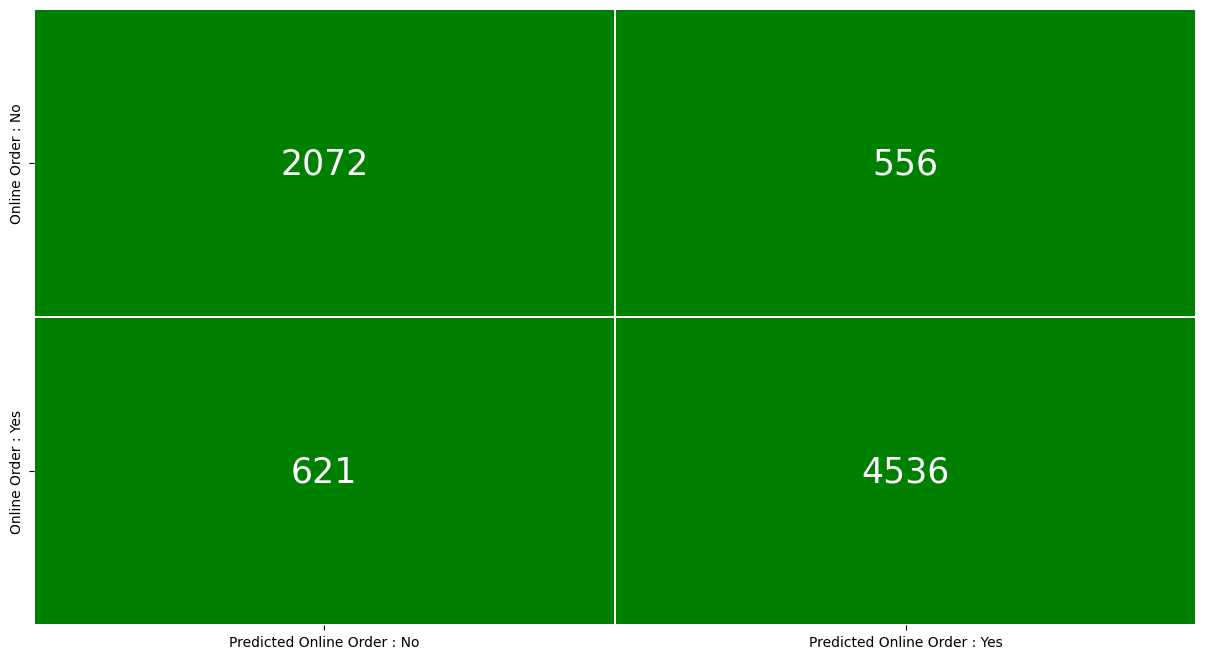

In [65]:
plot_confusion_matrix(stack_gb,X_test,y_test)

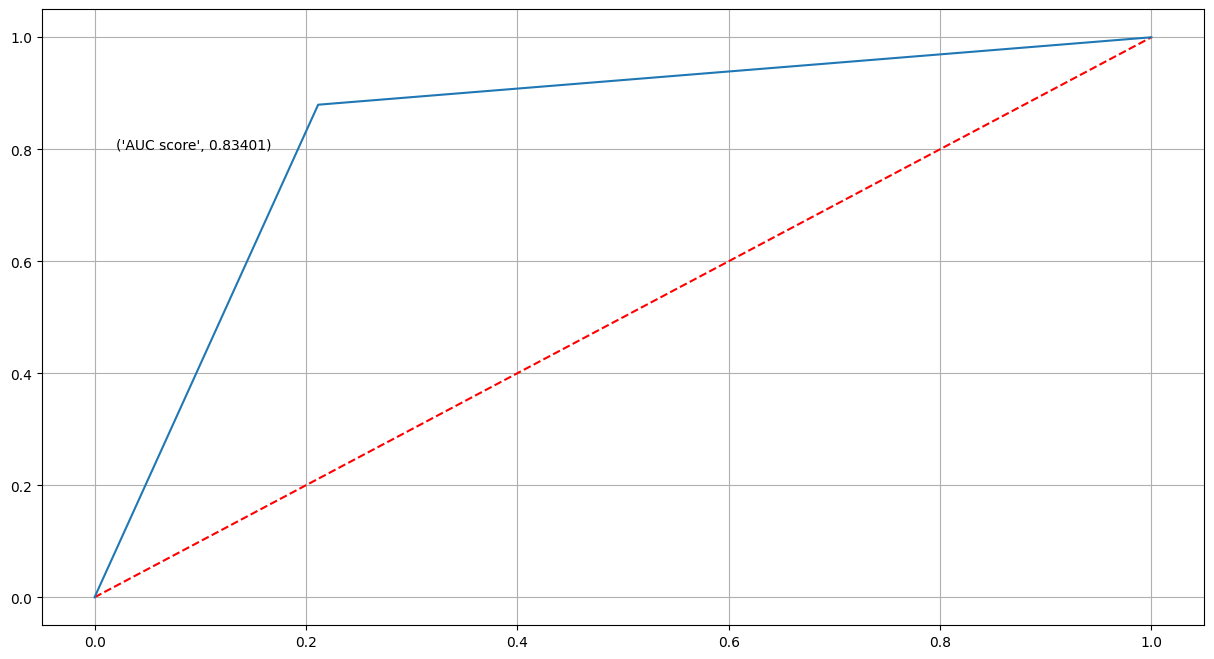

In [66]:
plot_roc_auc_curve(stack_gb,X_test,y_test)

In [67]:
# We able to improve the performance of model by 3% approx.
# Let try feature selection and see we can improve the model performance

# Feature Selection

In [68]:
X_train_signi = X_train[['votes', 'rate','location', 'rest_type', 'cuisines']]
X_test_signi = X_test[['votes', 'rate','location', 'rest_type', 'cuisines']]


base_learners = [('Random Forest',RandomForestClassifier(random_state=10)),
                ('Decision Tree',DecisionTreeClassifier(random_state=3)),
                ('Ada Boosting',AdaBoostClassifier(random_state=2)),
                ('Gradient Boosting',GradientBoostingClassifier(random_state=3)),
                ('XGB Boosting',XGBClassifier(random_state=1))]

#  {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}
skf = StratifiedKFold(n_splits=10)
stack_gb2 = StackingClassifier(estimators=base_learners,final_estimator=LogisticRegression(random_state=20)
                              ,cv=skf,passthrough=False,stack_method='predict_proba')
stack_gb2.fit(X_train_signi,y_train)
eval_metric(stack_gb2,X_test_signi,y_test)

Accuracy Score :  0.9582530507385999
Recall Score :  0.9769245685476052
Precision Score : 0.9607170099160945
F1 Score :  0.9687530045187962
Cohen_kappa_score :  0.9058914228882102
Roc_auc_score :  0.9492689813818697
*************************************************************************
Confusion Matrix :
  [[2422  206]
 [ 119 5038]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2628
           1       0.96      0.98      0.97      5157

    accuracy                           0.96      7785
   macro avg       0.96      0.95      0.95      7785
weighted avg       0.96      0.96      0.96      7785



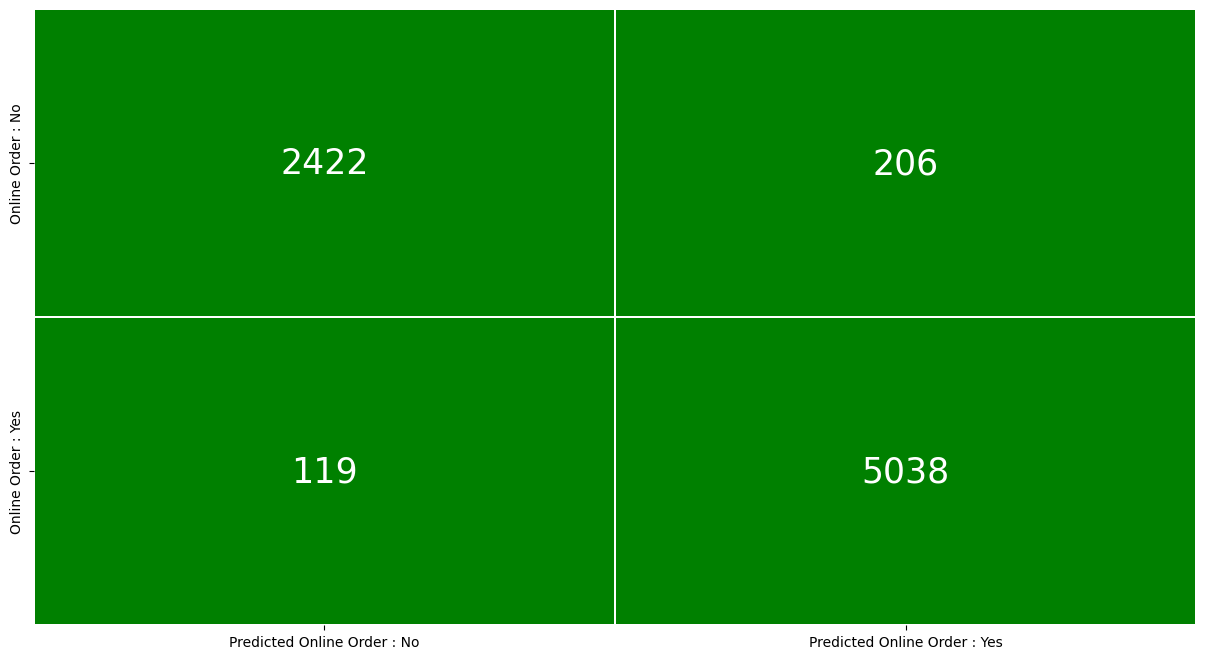

In [69]:
plot_confusion_matrix(stack_gb2,X_test_signi,y_test)

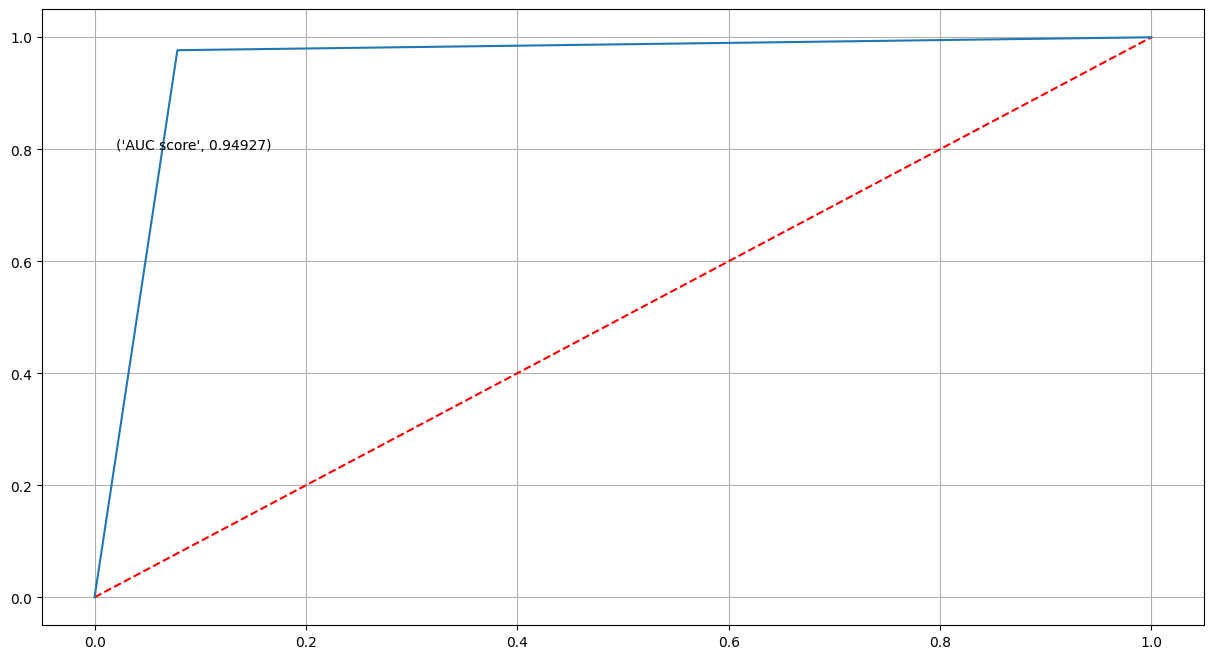

In [70]:
plot_roc_auc_curve(stack_gb2,X_test_signi,y_test)

In [71]:
# We able to increase the overall model performance significant by feature selection (around 12 %). Let try to add a feature 
# or 2 to see we can increase performance of model

In [72]:
# We able to increase the overall model performance significant by feature selection (around 12 %). Let try to add a feature 
# or 2 to see we can increase performance of model

In [73]:
# Let's try to add new variable

In [76]:
X_train_signi = X_train[['votes', 'rate','location', 'rest_type', 'cuisines','book_table']]
X_test_signi = X_test[['votes', 'rate','location', 'rest_type', 'cuisines','book_table']]


base_learners = [('Random Forest',RandomForestClassifier(n_estimators=75,max_depth=50,random_state=10)),
                ('Decision Tree',DecisionTreeClassifier(max_depth=50,random_state=3)),
                ('Ada Boosting',AdaBoostClassifier(random_state=2)),
                ('Gradient Boosting',GradientBoostingClassifier(random_state=3)),
                ('XGB Boosting',XGBClassifier(random_state=1)),
                ('BaggingClassifier',BaggingClassifier(random_state=4))]

#  {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}
skf = StratifiedKFold(n_splits=10)
stack_gb3 = StackingClassifier(estimators=base_learners,final_estimator=LogisticRegression(random_state=20)
                              ,cv=skf,passthrough=False,stack_method='predict_proba')
stack_gb3.fit(X_train_signi,y_train)
eval_metric(stack_gb3,X_test_signi,y_test)

Accuracy Score :  0.9594091201027617
Recall Score :  0.9767306573589296
Precision Score : 0.962545385056373
F1 Score :  0.9695861405197305
Cohen_kappa_score :  0.9085920894402361
Roc_auc_score :  0.9510746133065575
*************************************************************************
Confusion Matrix :
  [[2432  196]
 [ 120 5037]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2628
           1       0.96      0.98      0.97      5157

    accuracy                           0.96      7785
   macro avg       0.96      0.95      0.95      7785
weighted avg       0.96      0.96      0.96      7785



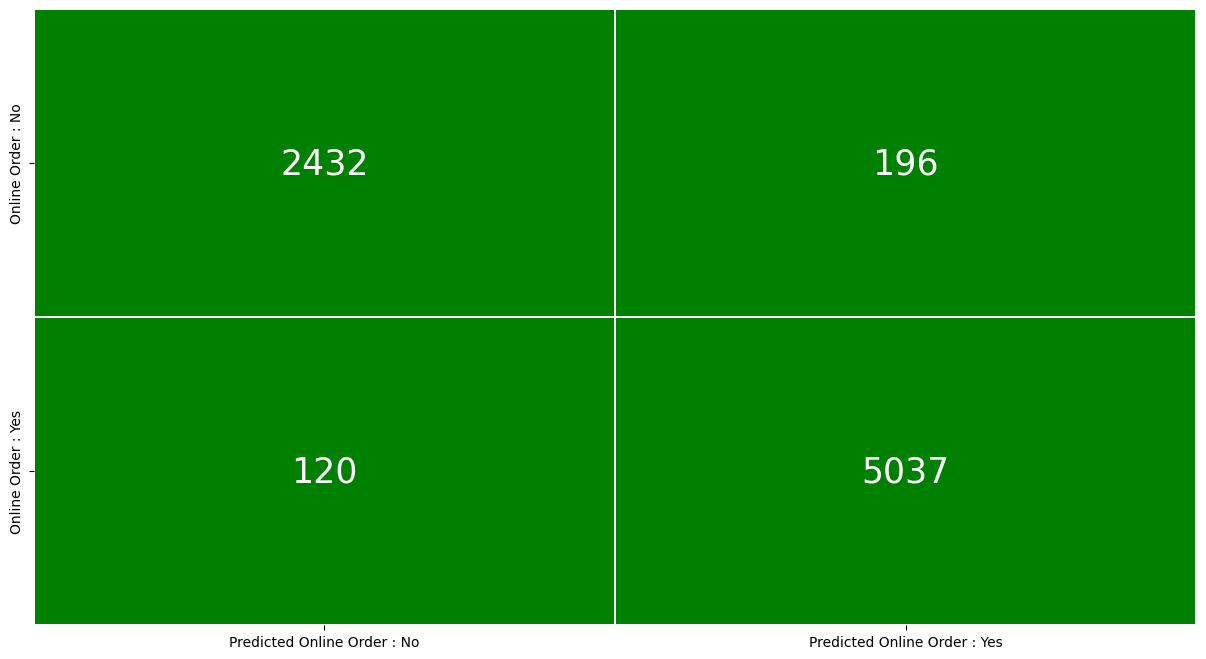

In [77]:
plot_confusion_matrix(stack_gb3,X_test_signi,y_test)

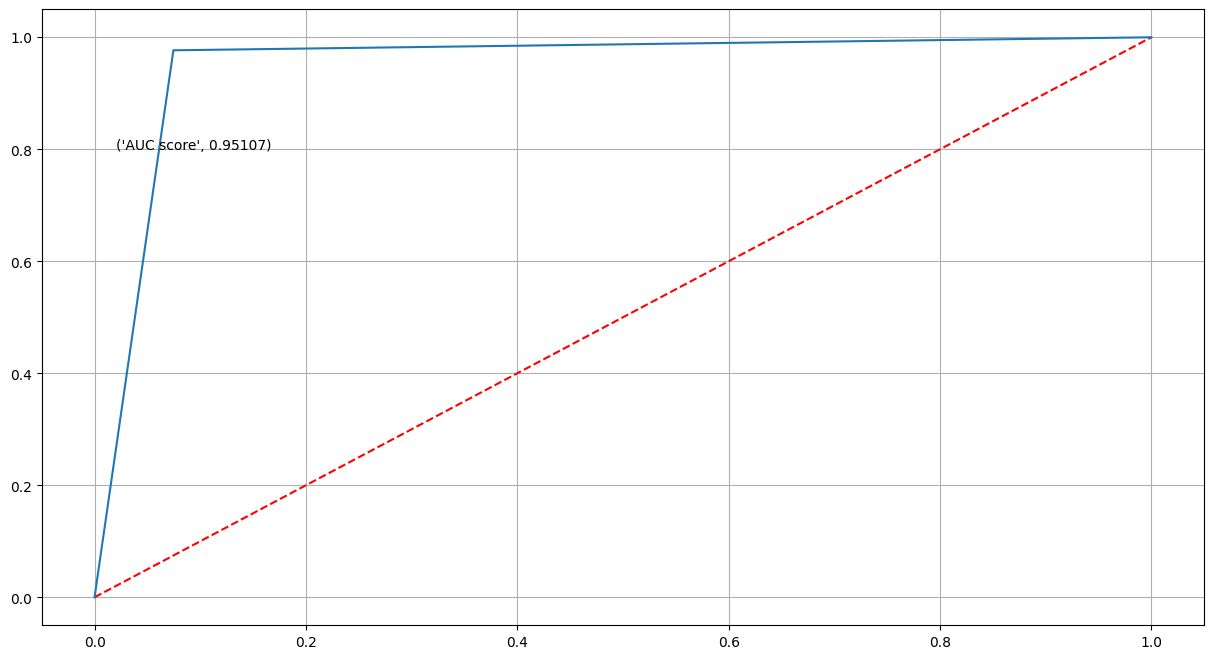

In [78]:
plot_roc_auc_curve(stack_gb3,X_test_signi,y_test)

In [ ]:
# We able to improve performance slightly by adding 1 features. Let's now try to tune the hyper parameter.

# Hyperparameter Tuning

In [79]:
X_train_signi = X_train[['votes', 'rate','location', 'rest_type', 'cuisines','book_table']]
X_test_signi = X_test[['votes', 'rate','location', 'rest_type', 'cuisines','book_table']]


base_learners = [('Random Forest',RandomForestClassifier(n_estimators=75,max_depth=50,random_state=10)),
                ('Decision Tree',DecisionTreeClassifier(max_depth=50,random_state=3)),
                ('Ada Boosting',AdaBoostClassifier(learning_rate=0.01,random_state=2)),
                ('Gradient Boosting',GradientBoostingClassifier(learning_rate=0.01,max_depth=10,random_state=3)),
                ('XGB Boosting',XGBClassifier(n_estimators=150,max_depth=30,gamma=0.001,random_state=1)),
                ('BaggingClassifier',BaggingClassifier(random_state=4)),
                ('KNN',KNeighborsClassifier(n_neighbors=20))]

skf = StratifiedKFold(n_splits=10)
stack_gb4 = StackingClassifier(estimators=base_learners,final_estimator=LogisticRegression(random_state=20)
                              ,cv=skf,passthrough=False,stack_method='auto')
stack_gb4.fit(X_train_signi,y_train)
eval_metric(stack_gb4,X_test_signi,y_test)

Accuracy Score :  0.9614643545279383
Recall Score :  0.9792515028117122
Precision Score : 0.9631890139233263
F1 Score :  0.971153846153846
Cohen_kappa_score :  0.9131387149617642
Roc_auc_score :  0.9529058122886568
*************************************************************************
Confusion Matrix :
  [[2435  193]
 [ 107 5050]]
*************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      2628
           1       0.96      0.98      0.97      5157

    accuracy                           0.96      7785
   macro avg       0.96      0.95      0.96      7785
weighted avg       0.96      0.96      0.96      7785



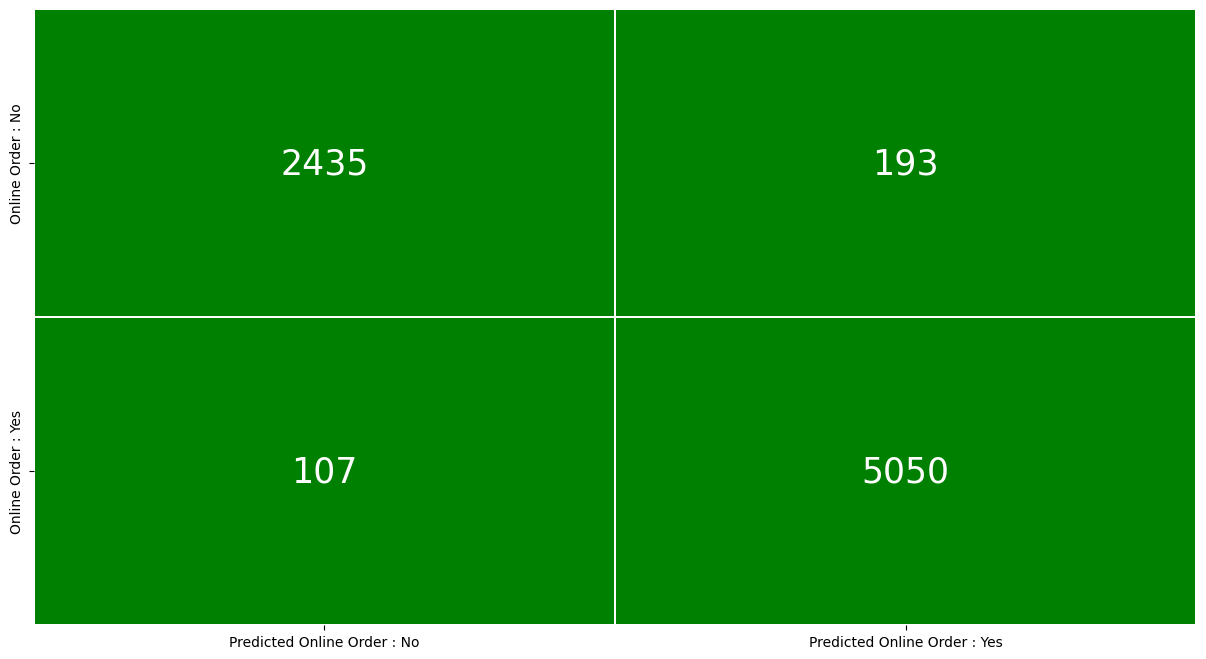

In [80]:
plot_confusion_matrix(stack_gb4,X_test_signi,y_test)

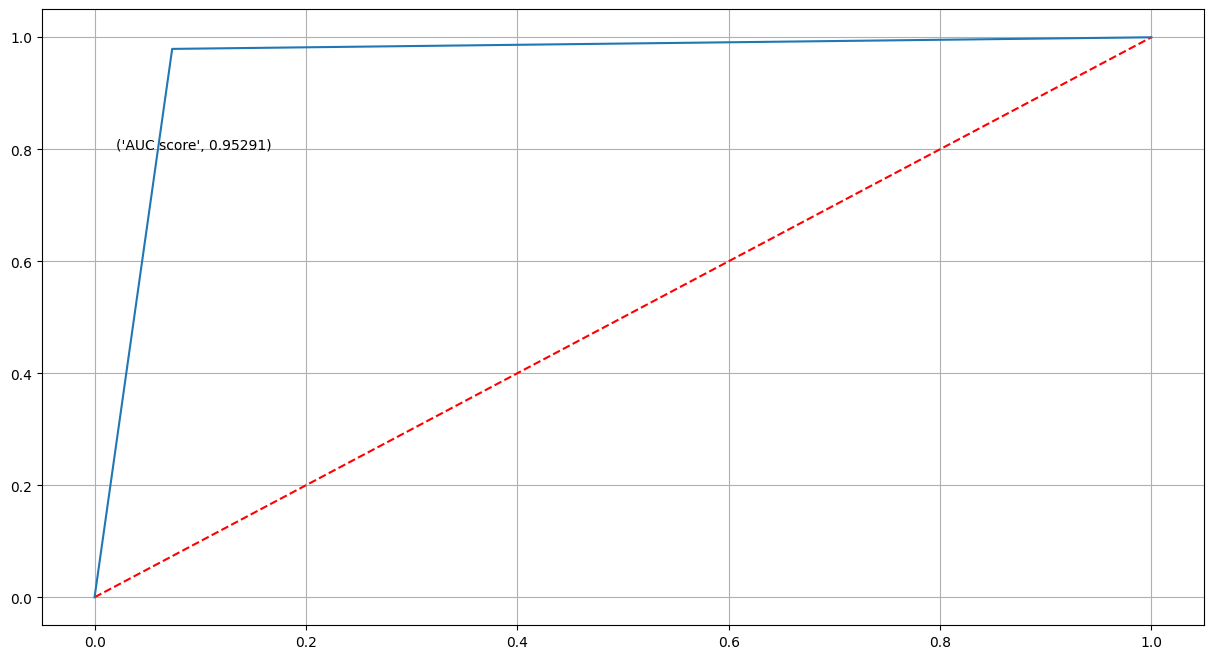

In [81]:
plot_roc_auc_curve(stack_gb4,X_test_signi,y_test)

In [ ]:
# We able to improve the model performance by using Hyperparameter tuning
# 'votes', 'rate','location', 'rest_type', 'cuisines','book_table' are significant variables